# EDA & TimeSeries futher ANALYSIS

In [131]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.0 MB/s eta 0:00:00a 0:00:01


In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from wordcloud import WordCloud
import datetime 
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import ARIMA
from pmdarima.arima import auto_arima
import os

преобразуем в datatime


In [133]:
'''for file in os.listdir('/kaggle/working'):
    if file != '/kaggle/working/train':
        f = pd.read_csv(f'{file}')
        #print(f.head(2))
        print(file)
        print(f.columns)
        #f['Unnamed: 0'] = pd.to_datetime(f['Unnamed: 0'], format='%Y-%m-%d')
'''
        
for df in X_interpolated:
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y-%m-%d')
#X_interpolated[0].iloc[:, 0]

# ADFULLER TEST ON TREND IN TIMESERIES

In [134]:
from statsmodels. tsa.stattools import adfuller

In [135]:
'''import os
directory = '/kaggle/working'
for file in os.listdir(directory):
    res = pd.read_csv(f'{file}')
    res_row = res.iloc[:, 1]
    result = adfuller(res_row)
    print(result[1])
    p_val.append(result[1])
print(p_val)
'''
p_val, i = [], 0

for df in X_interpolated:
    i+=1
    res_row = df.iloc[:, 0]
    result = adfuller(res_row)
    p_val.append(result[1])
    if result[1] >= 0.05:
        print(i, result[1])

6 0.08188957957735477
8 0.1570680964942172
9 0.0859181341034082
13 0.143406296857844
14 0.07269669832149614
20 0.12781305326687592
22 0.09124952675456499
24 0.1271542379590317
25 0.12356978429068044
36 0.1286266570435884


# SARIMA
In order to figure out the parameters p,d,q,P,D,Q of SARIMA model we would need to plot the ACF and PACF plots.
ACF stands for Auto Correlation Function and PACF stands for Partial Auto Correlation Function.

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



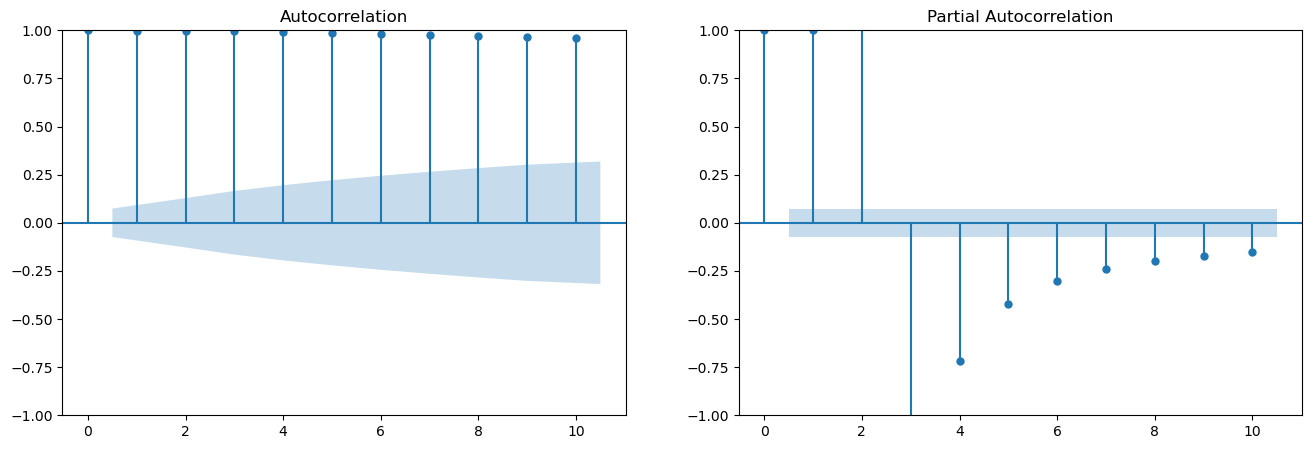

In [136]:
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for df in X_interpolated:
    df = df.iloc[:, 0]
    plot_acf(df,lags=10, ax=axes[0])
    plot_pacf(df,lags=10, ax=axes[1])
    plt.show()

# SARIMA 

In [137]:
models = []
for df in X_interpolated:
    df = df.iloc[:, 0]
    model=auto_arima(df,
                     start_p = 0,
                     start_q = 0,
                     d=3,
                     D=None,
                     m = 4,
                     seasonal = True,
                     test = "adf",
                     trace = True,
                     alpha = 0.05,
                     information_criterion = 'aic',
                     suppress_warnings = True, 
                     stepwise = False,
                     n_jobs = -1
                    )
    models.append(model)


Best model:  ARIMA(3,3,0)(2,0,0)[4]          
Total fit time: 30.685 seconds

Best model:  ARIMA(3,3,0)(2,0,0)[4]          
Total fit time: 27.155 seconds

Best model:  ARIMA(3,3,0)(2,0,0)[4]          
Total fit time: 25.231 seconds

Best model:  ARIMA(3,3,0)(2,0,0)[4]          
Total fit time: 26.979 seconds

Best model:  ARIMA(3,3,0)(2,0,0)[4]          
Total fit time: 28.106 seconds
 ARIMA(0,3,0)(0,0,0)[4]             : AIC=6620.097, Time=0.10 sec
 ARIMA(0,3,0)(1,0,1)[4]             : AIC=6624.097, Time=0.16 sec
 ARIMA(0,3,0)(2,0,0)[4]             : AIC=6624.094, Time=0.14 sec
 ARIMA(0,3,0)(2,0,2)[4]             : AIC=6628.094, Time=0.33 sec
 ARIMA(0,3,1)(1,0,1)[4]             : AIC=inf, Time=0.76 sec
 ARIMA(0,3,1)(2,0,1)[4]             : AIC=inf, Time=1.96 sec
 ARIMA(0,3,2)(1,0,0)[4]             : AIC=inf, Time=1.05 sec
 ARIMA(0,3,2)(2,0,0)[4]             : AIC=inf, Time=1.78 sec
 ARIMA(0,3,3)(1,0,0)[4]             : AIC=inf, Time=1.19 sec
 ARIMA(1,3,0)(0,0,0)[4]             : AIC

In [138]:
len(models)

36

. Поскольку p-значение теста Льюнга-Бокса больше 0,05, мы не можем отвергнуть нулевую гипотезу о том, что остатки независимы.


. Поскольку p-значение теста гетероскедастичности больше 0,05, мы не можем отвергнуть нулевую гипотезу гомоскедастичности


. Поскольку p-значение теста Харке-Бера больше 0,05, мы не можем отвергнуть нулевую гипотезу и сделать вывод, что данные выборки подчиняются нормальному распределению. (очень далеко от нормального)

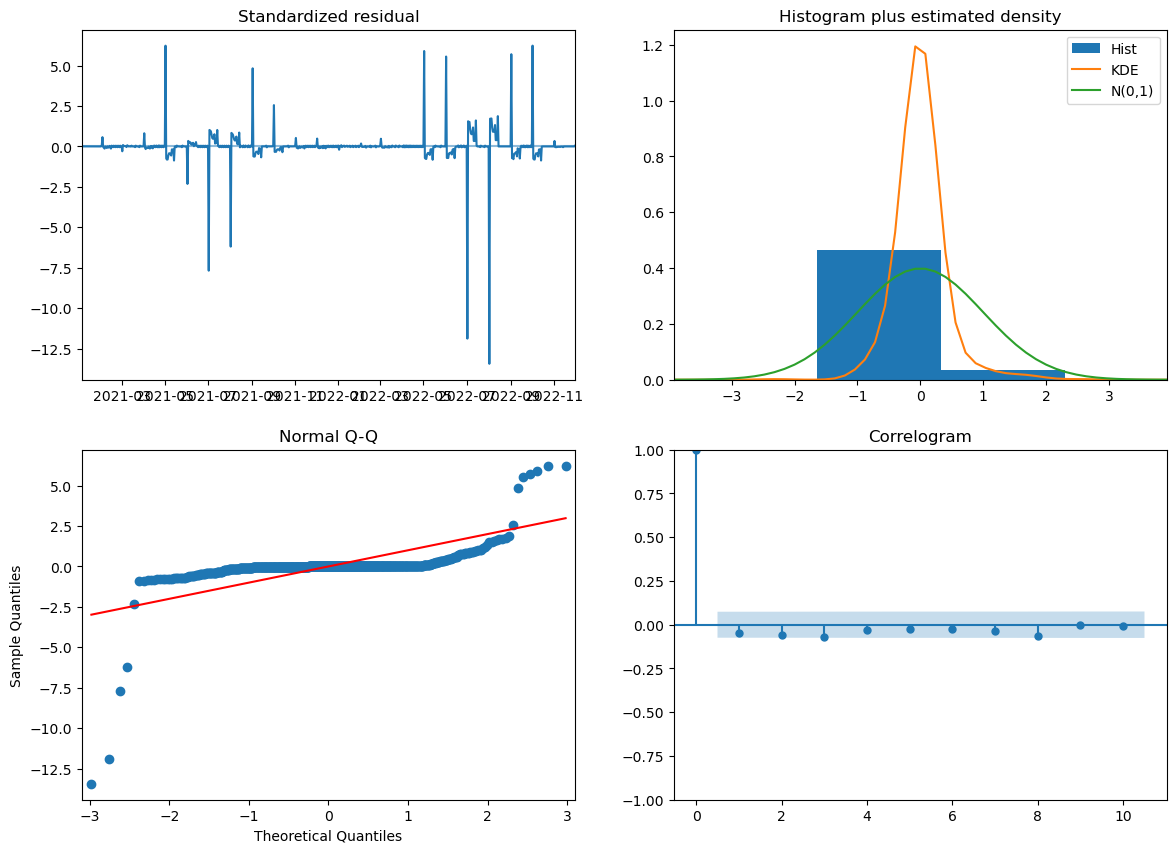

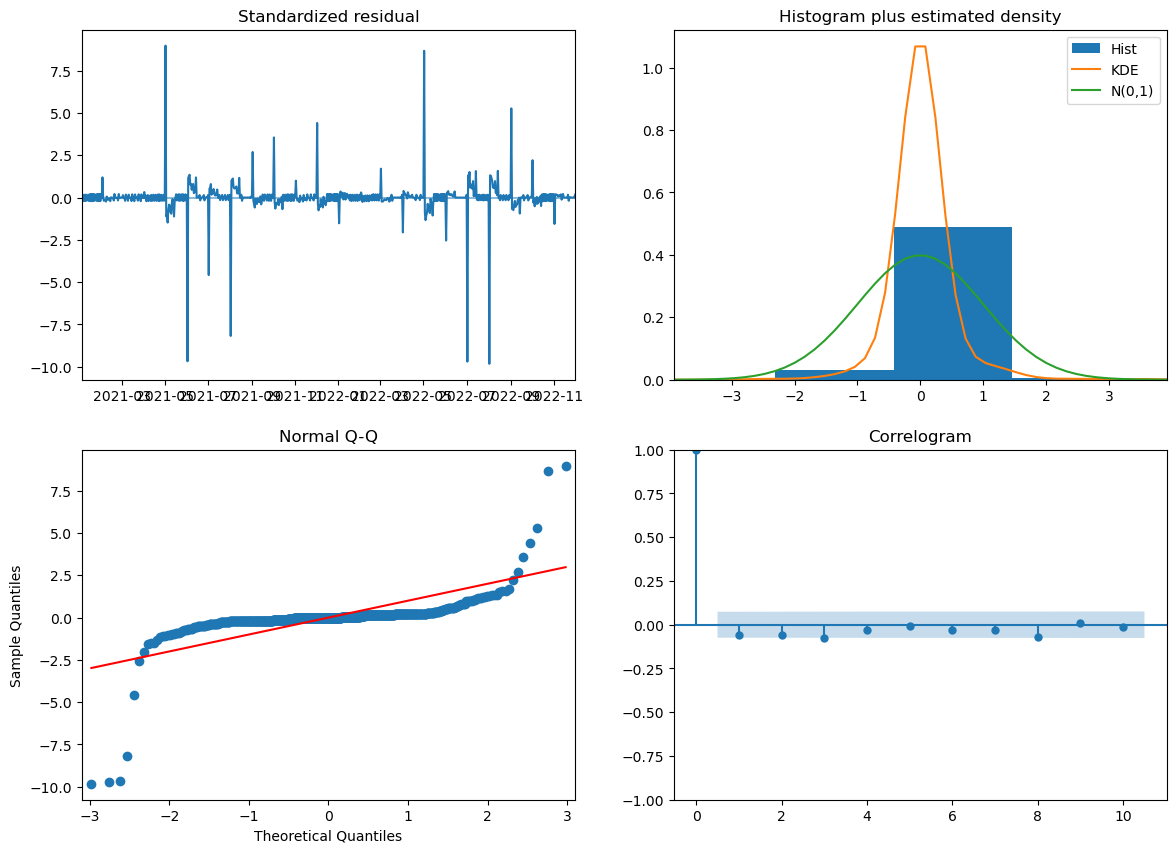

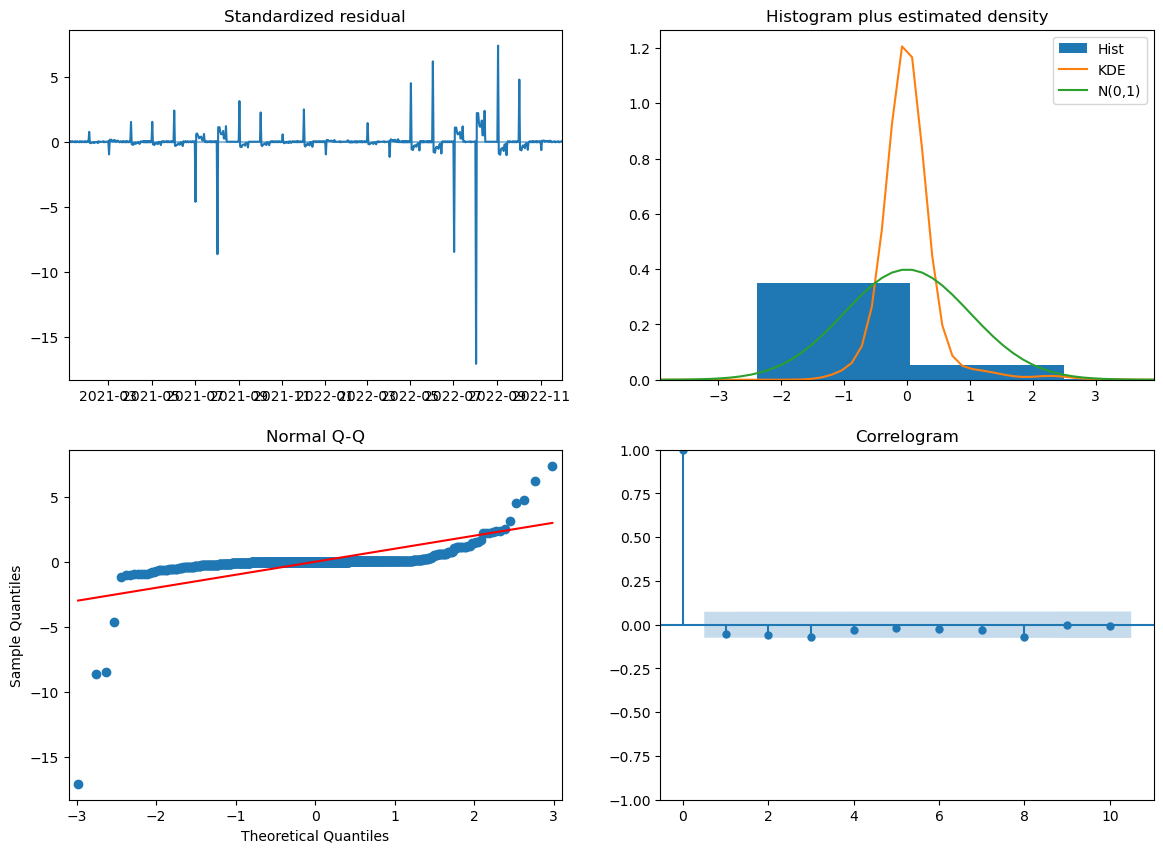

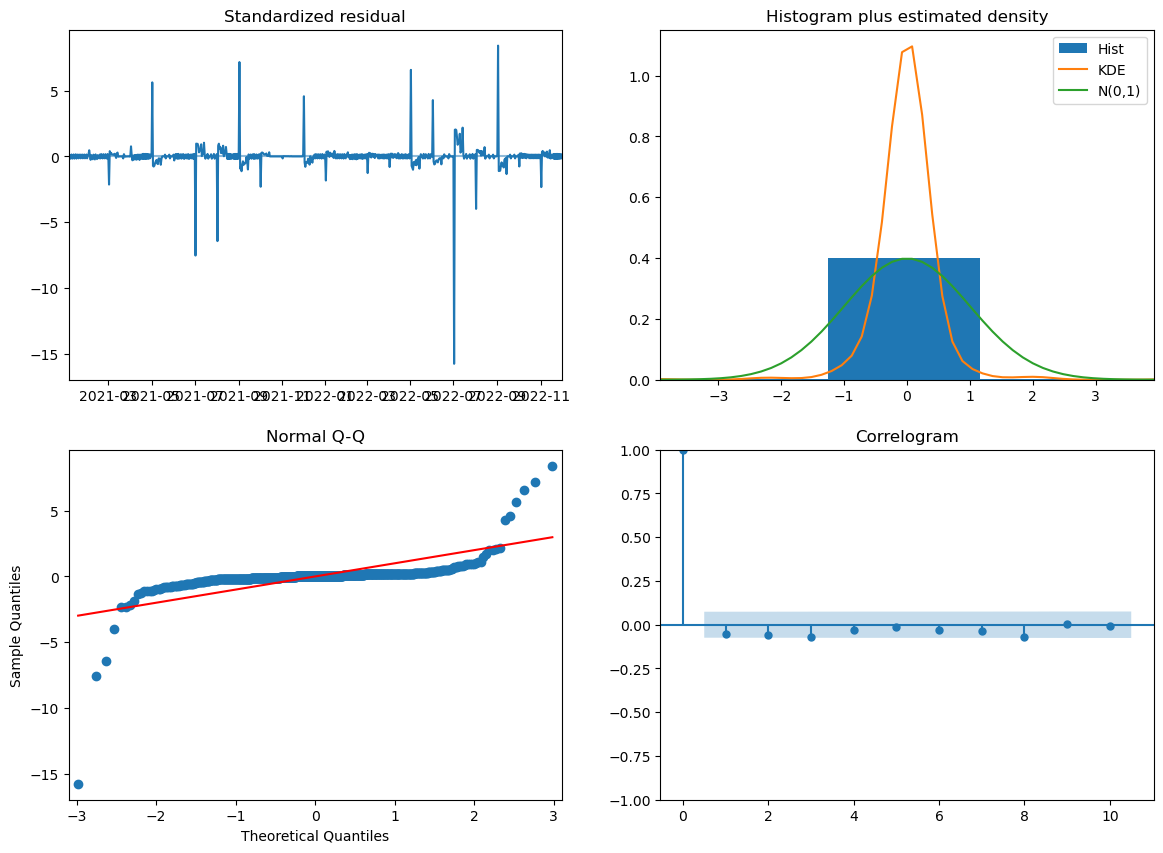

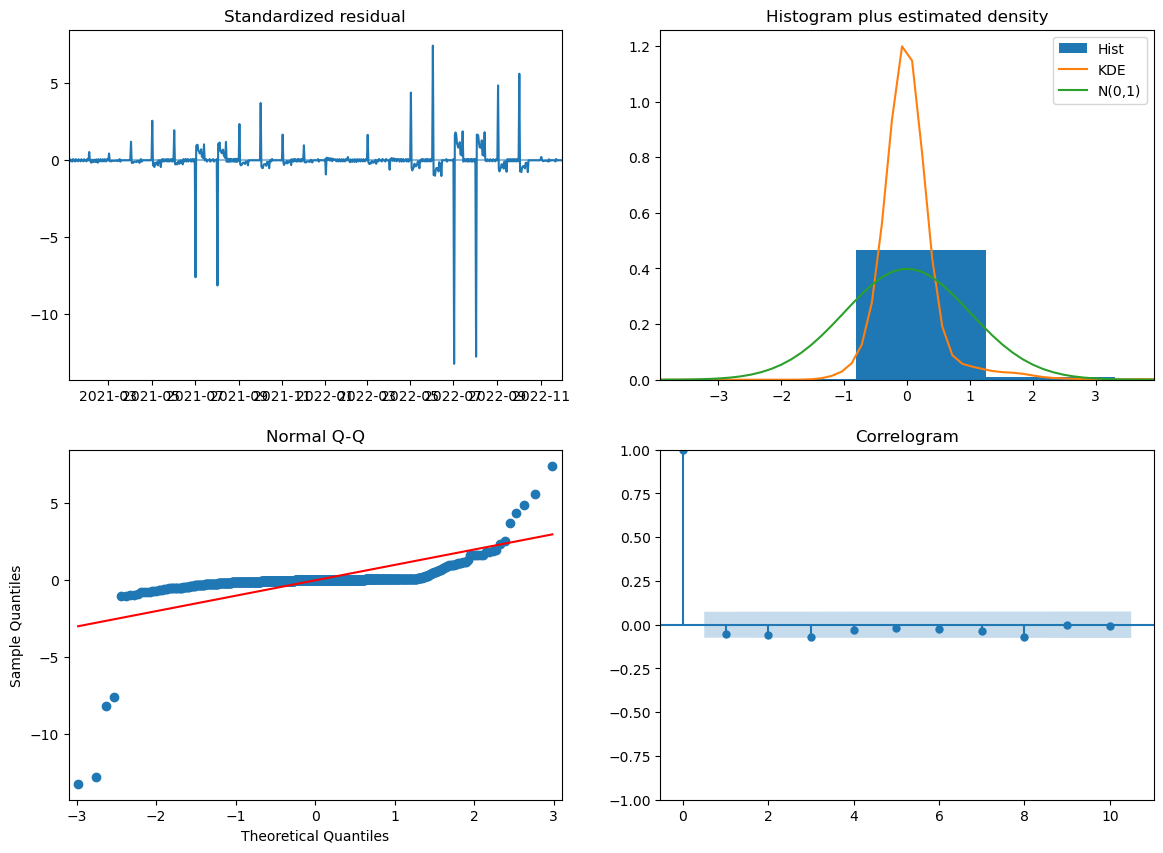

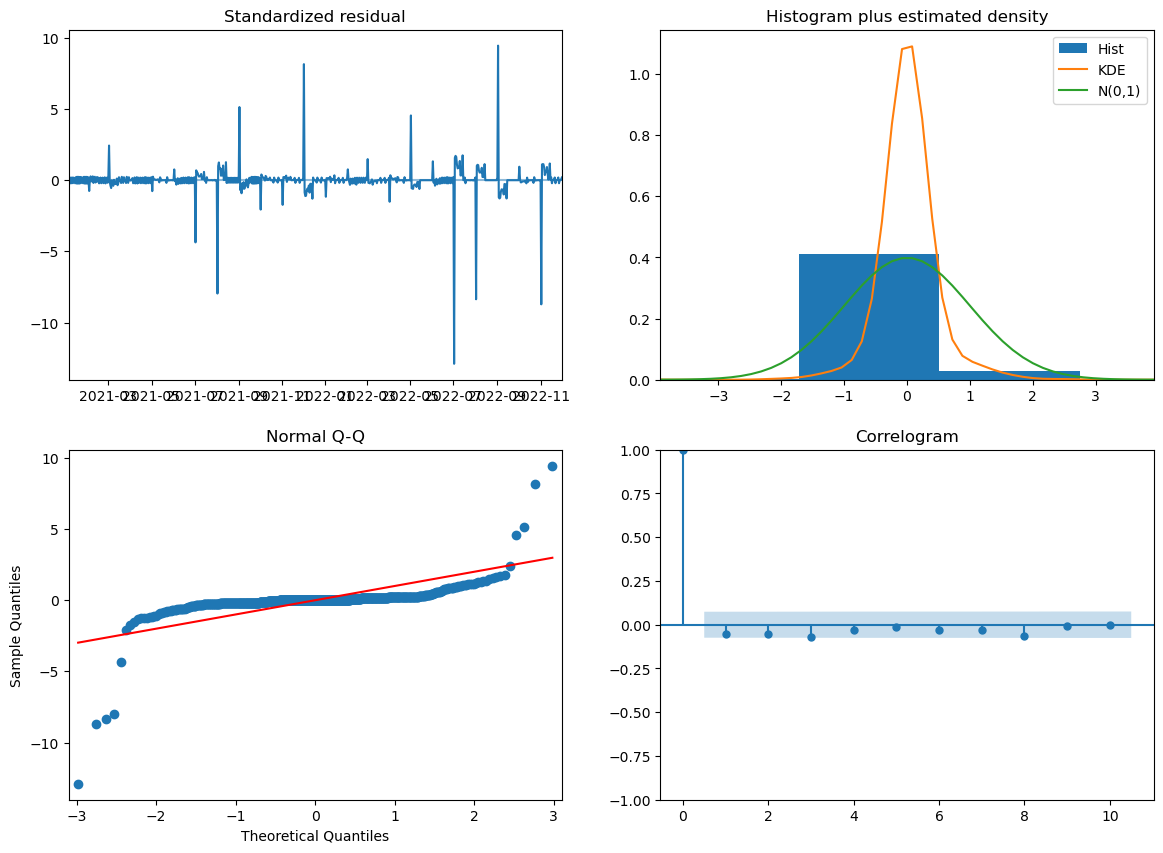

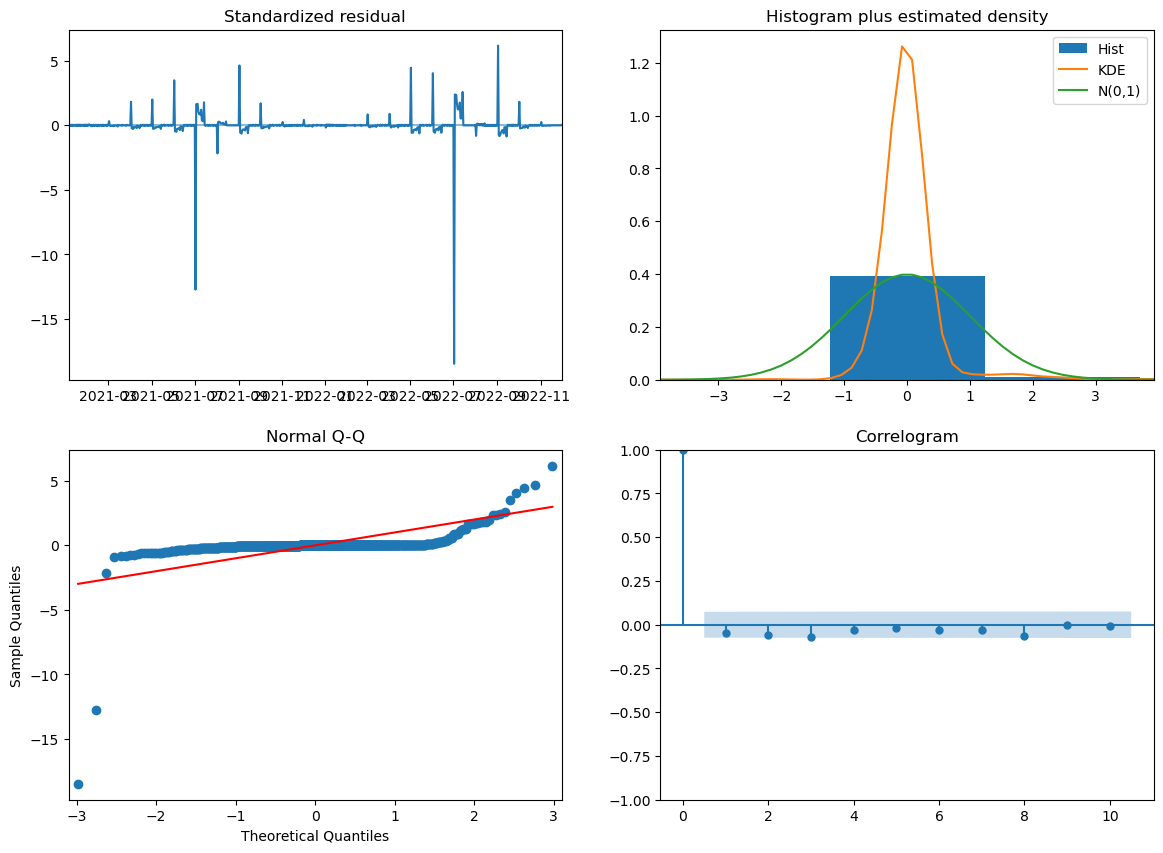

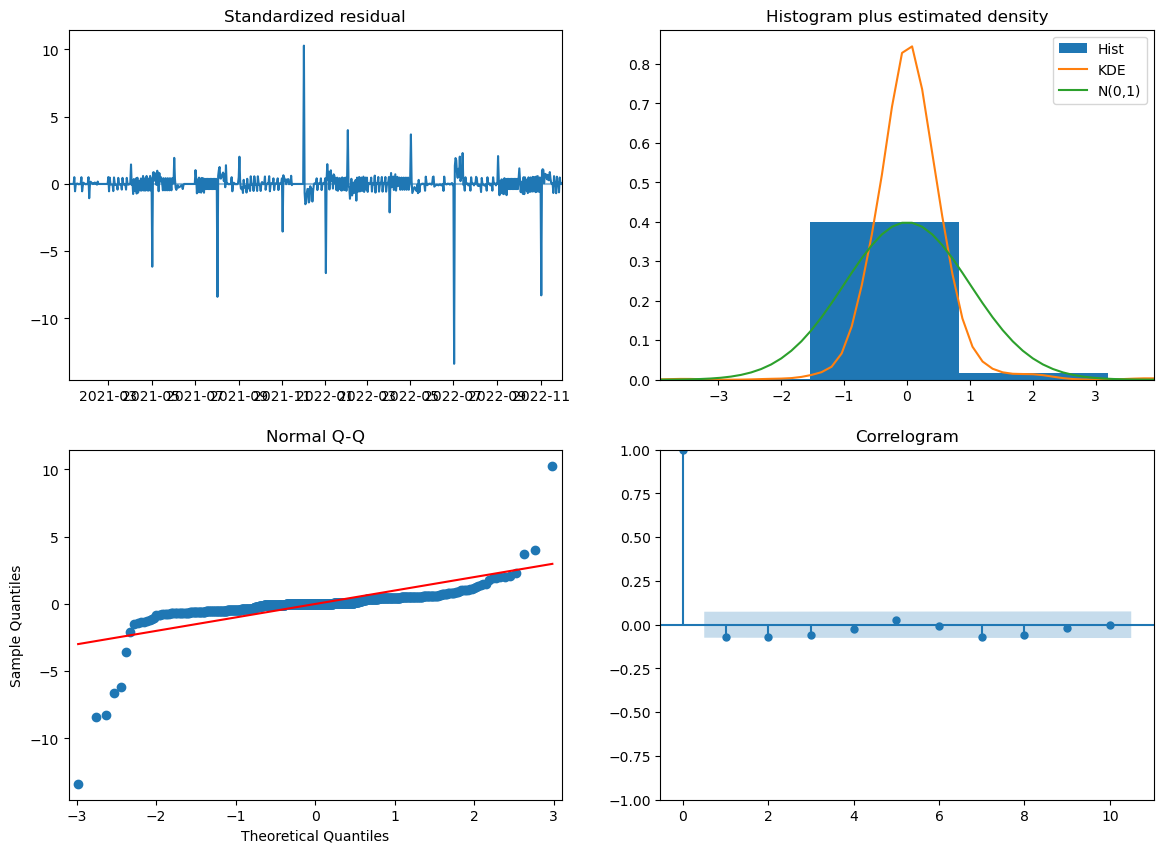

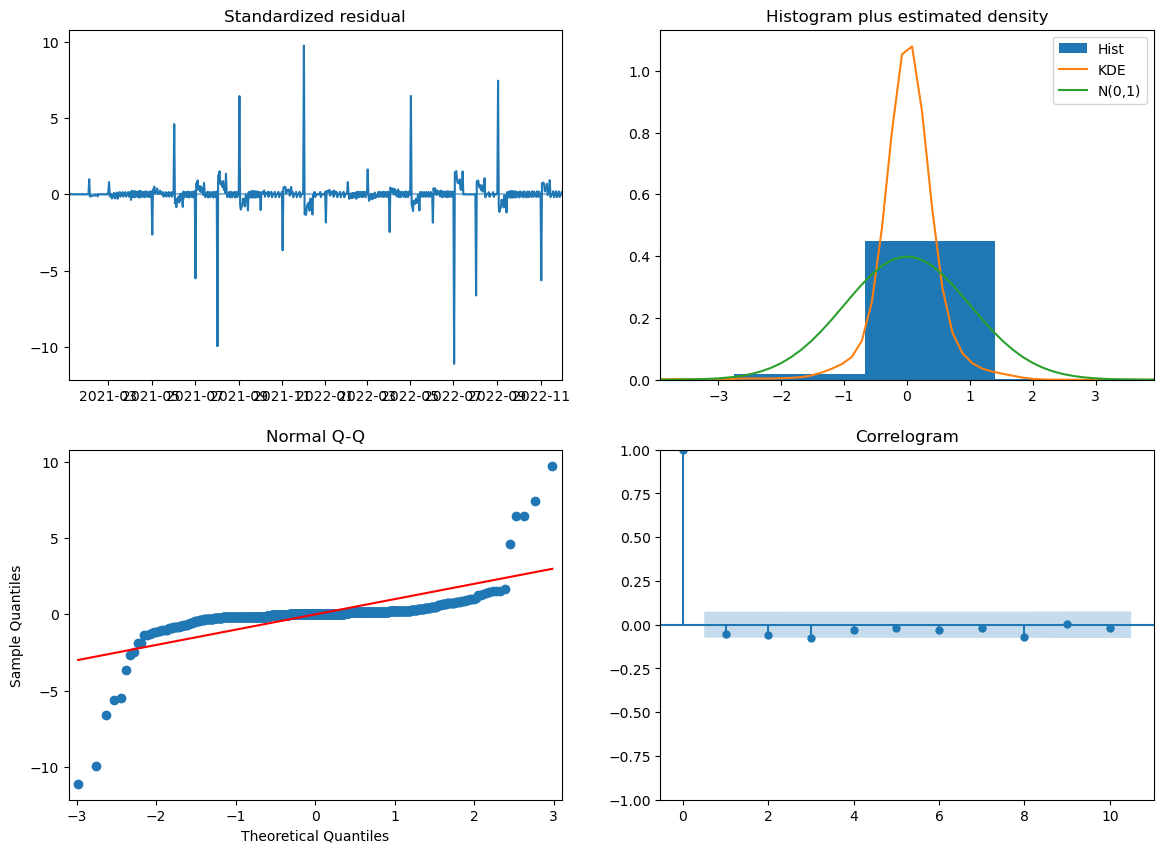

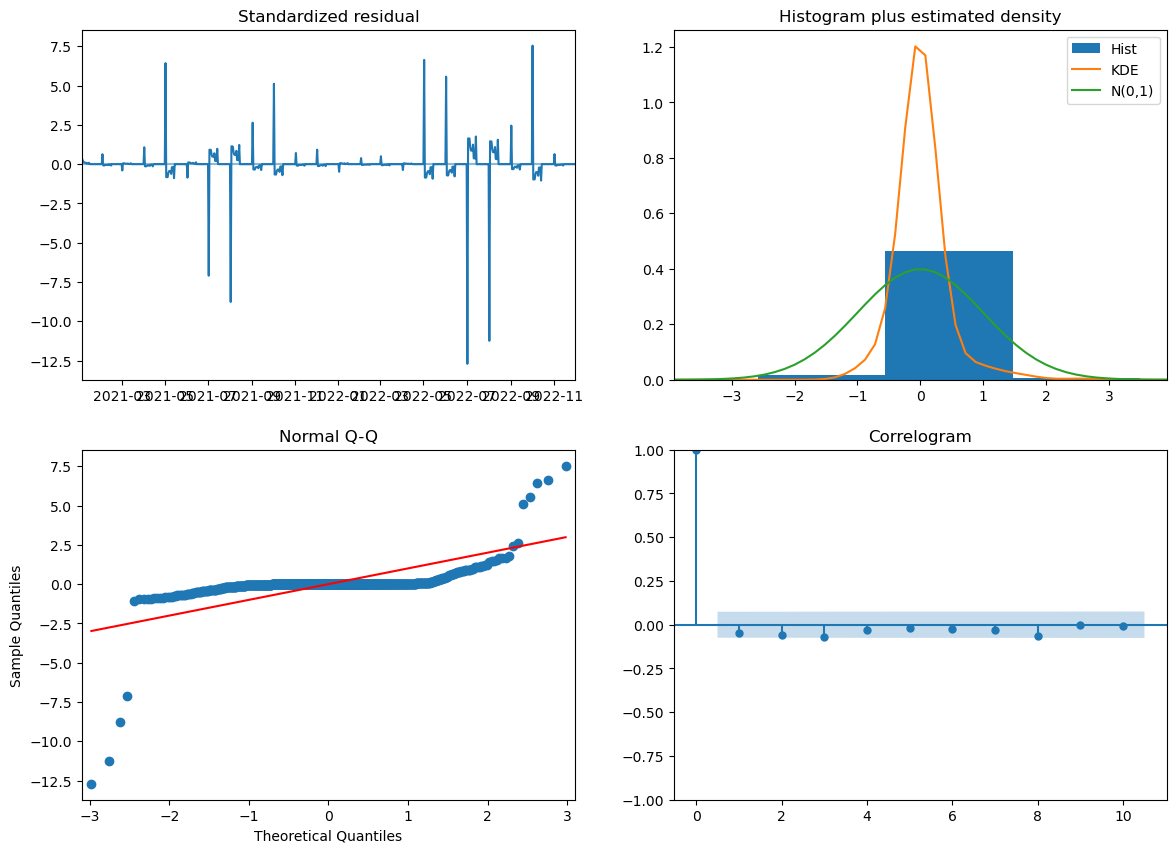

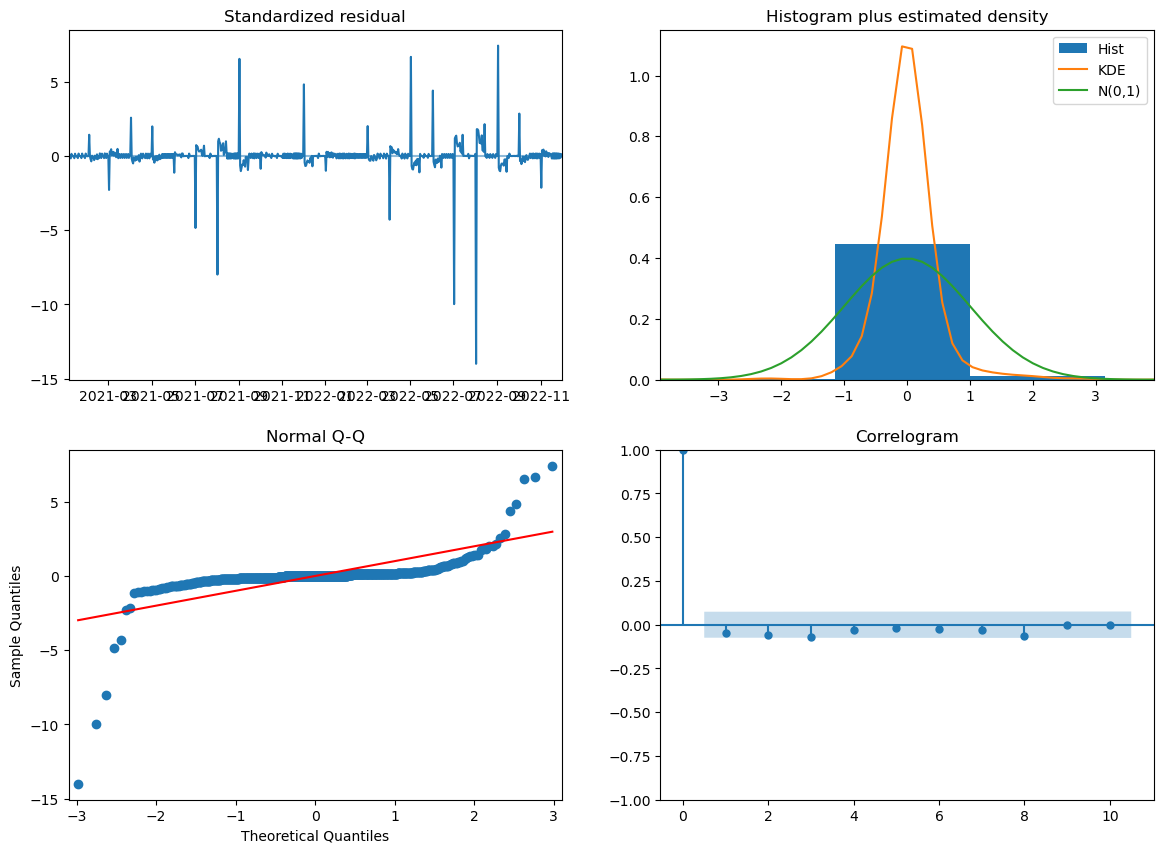

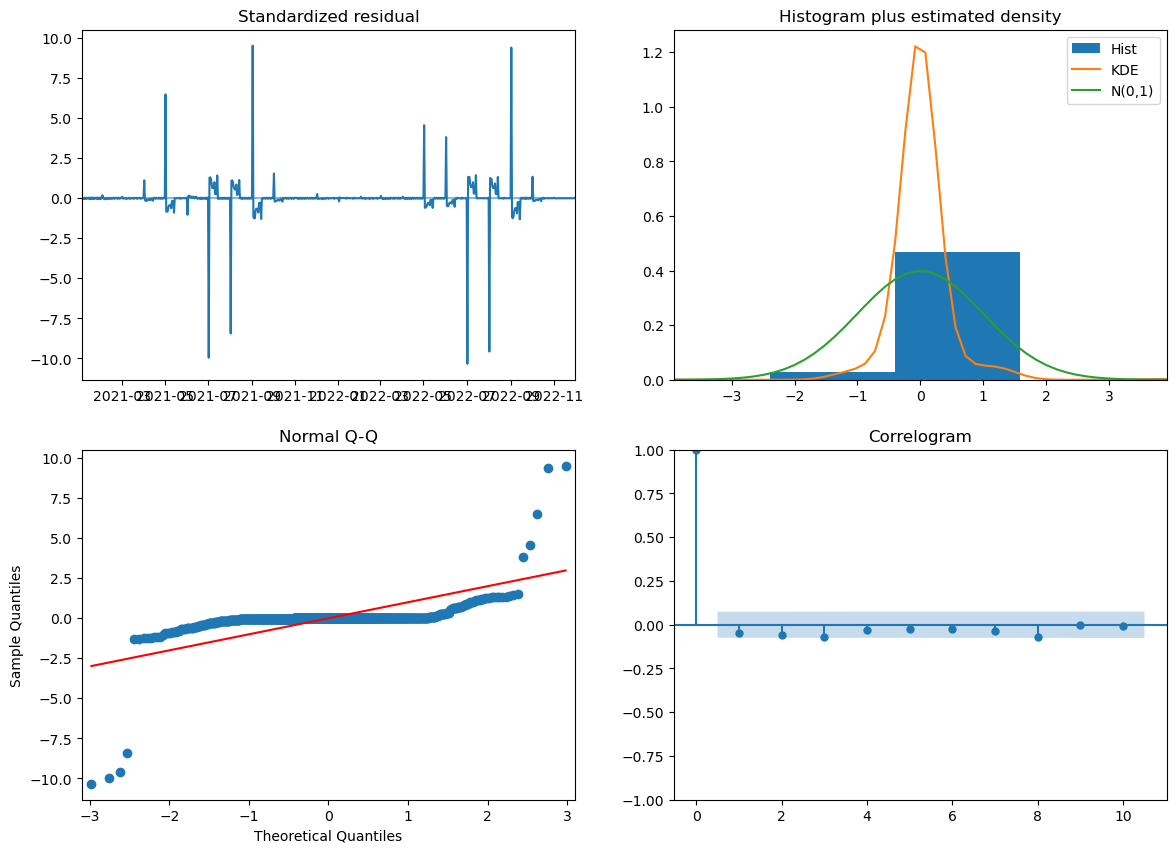

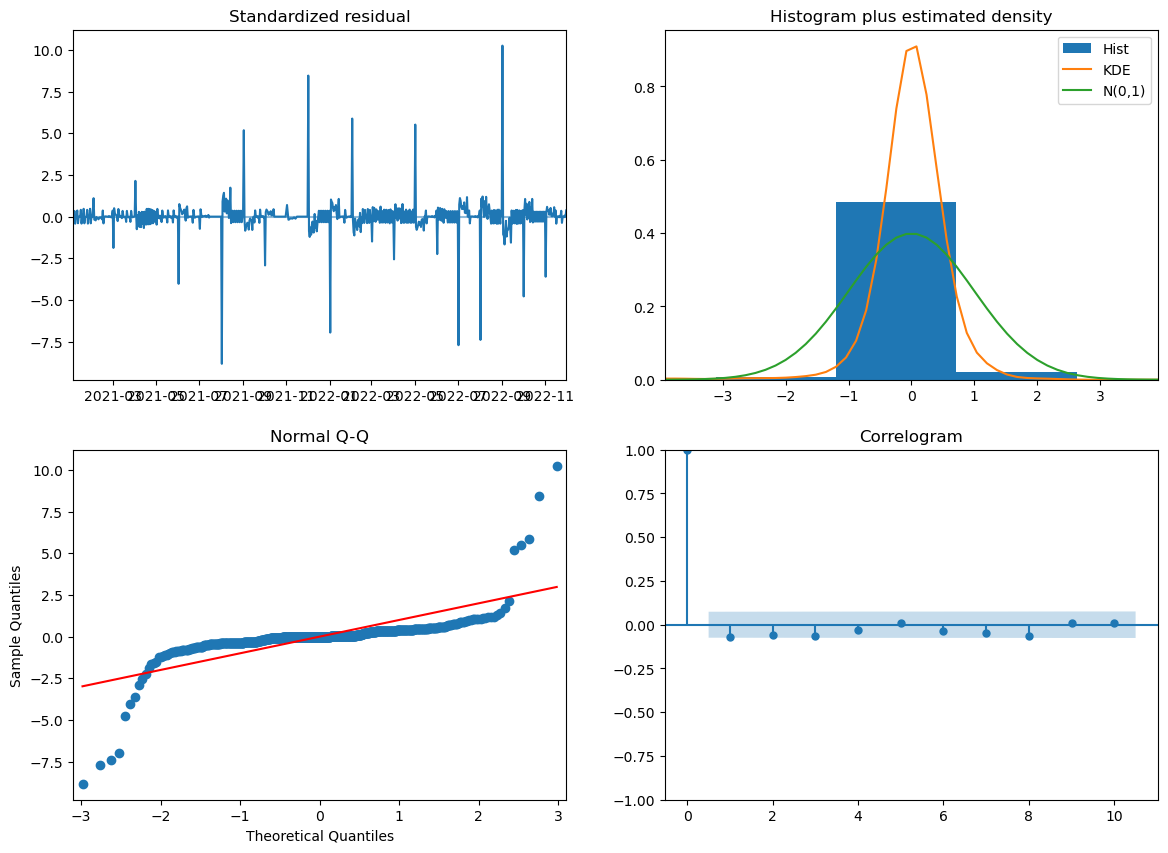

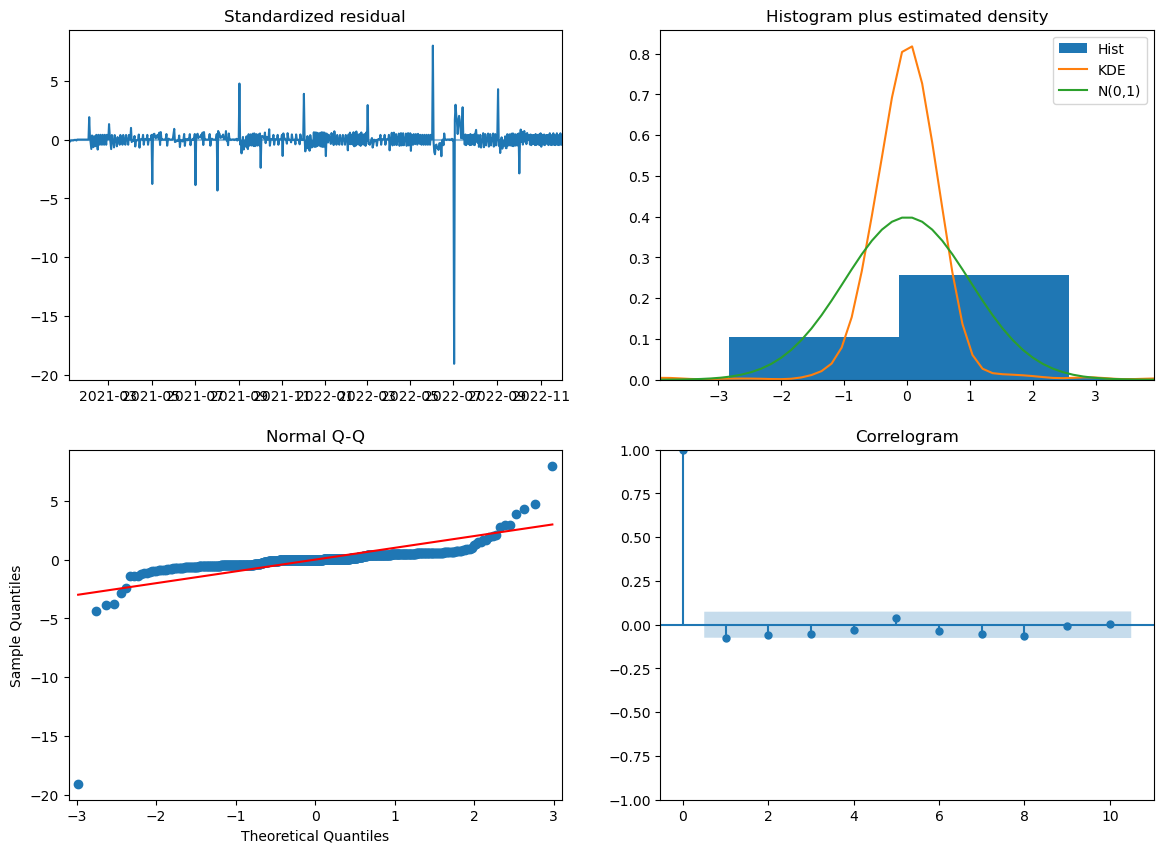

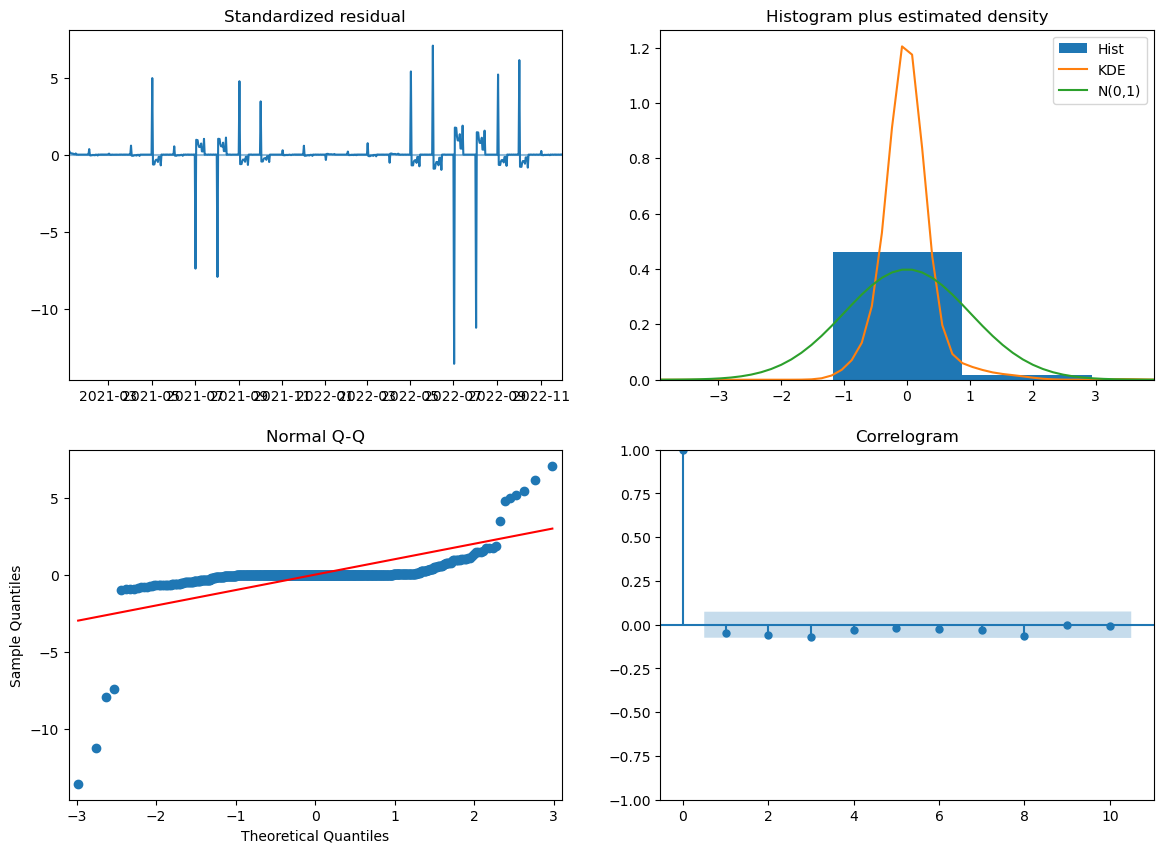

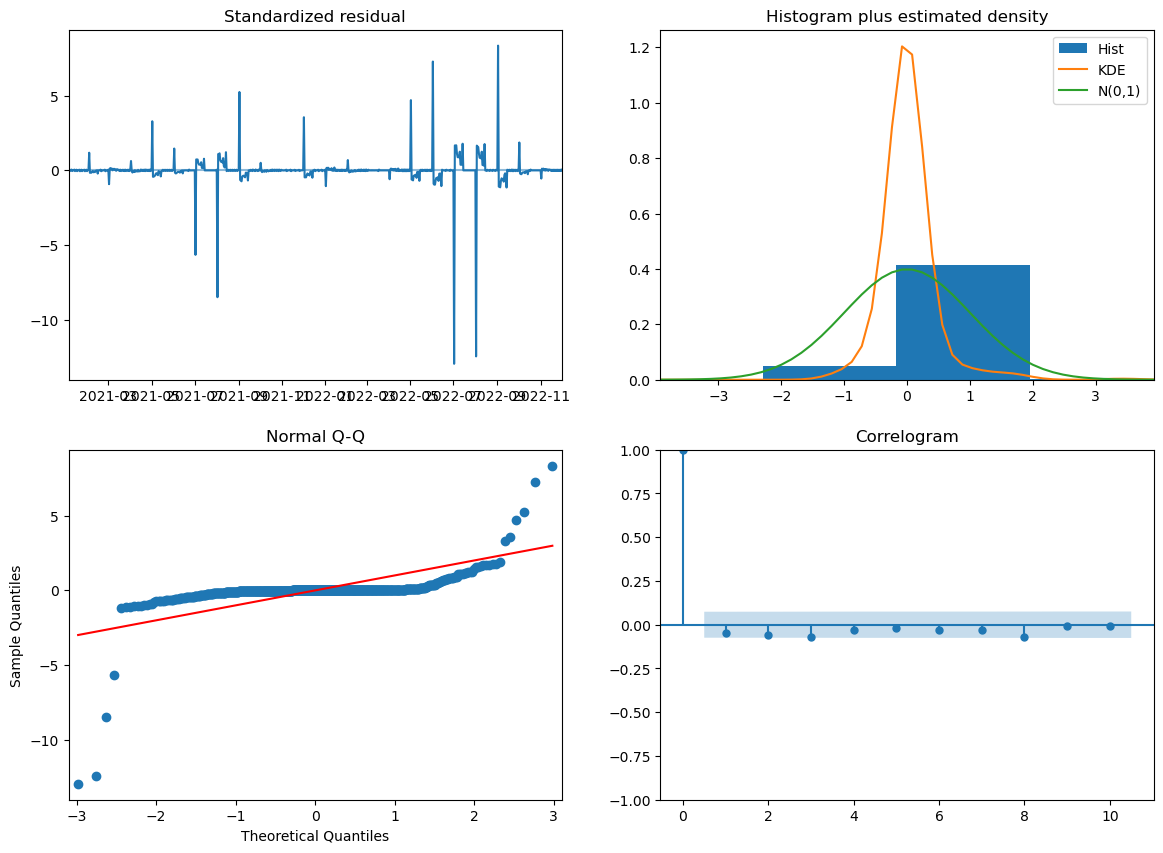

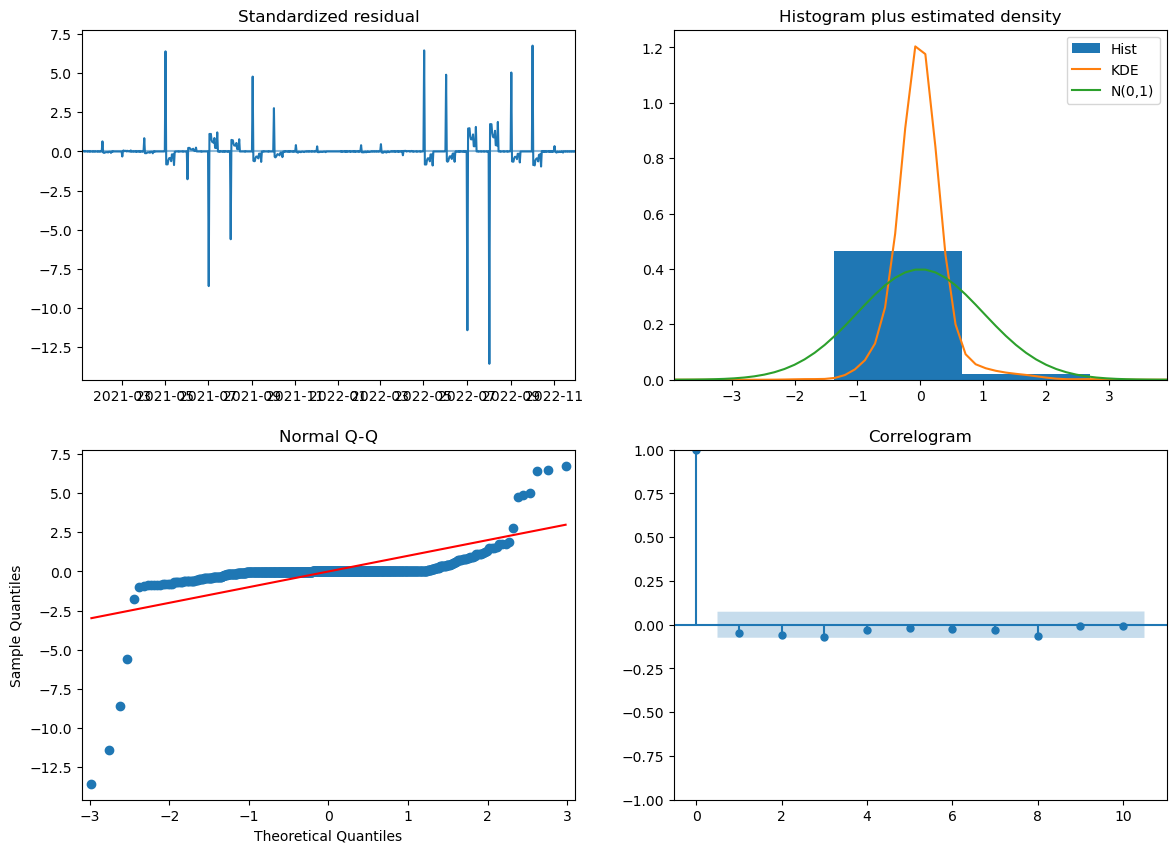

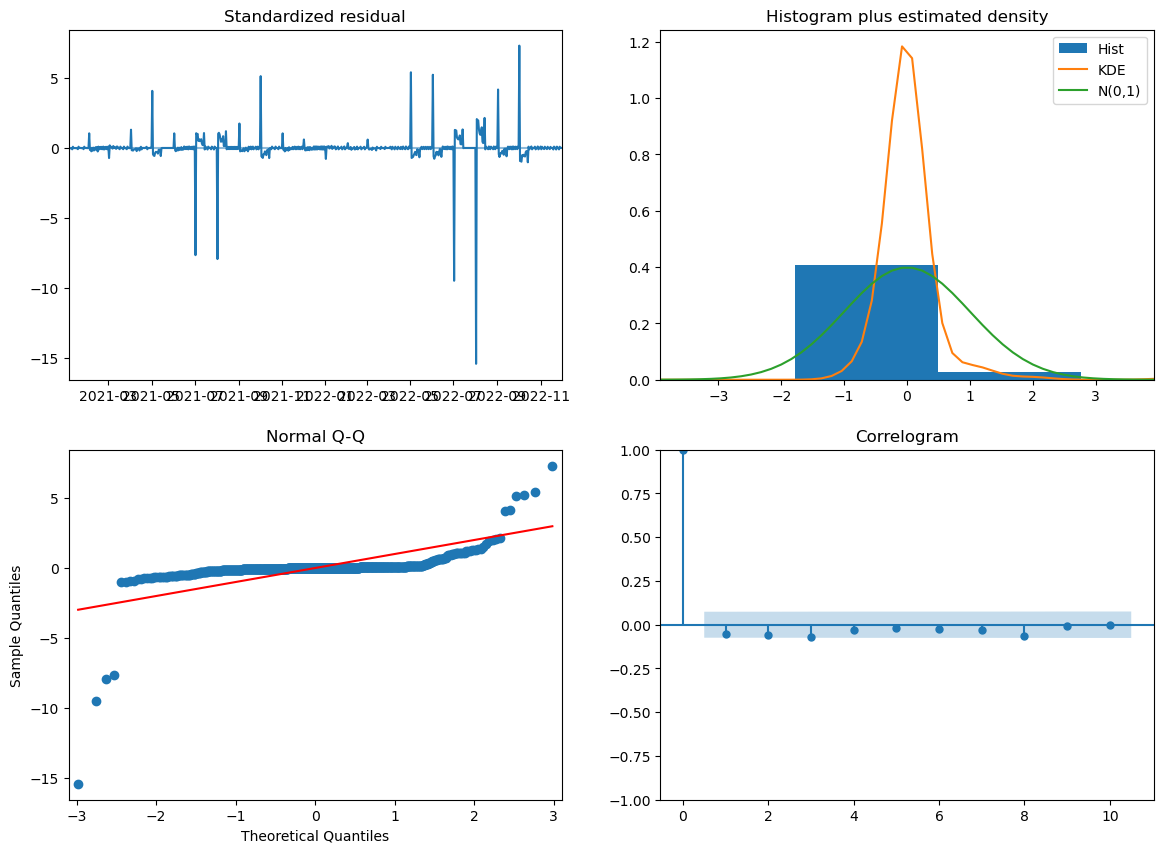

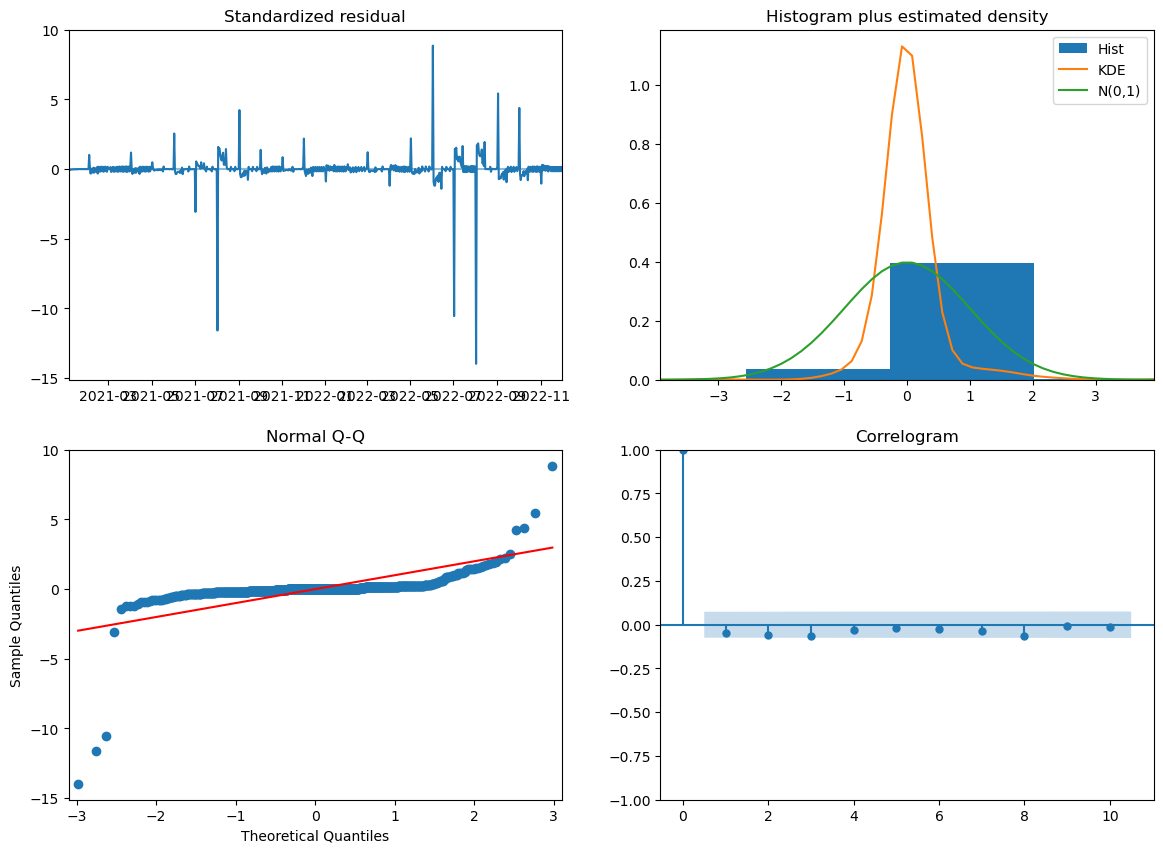

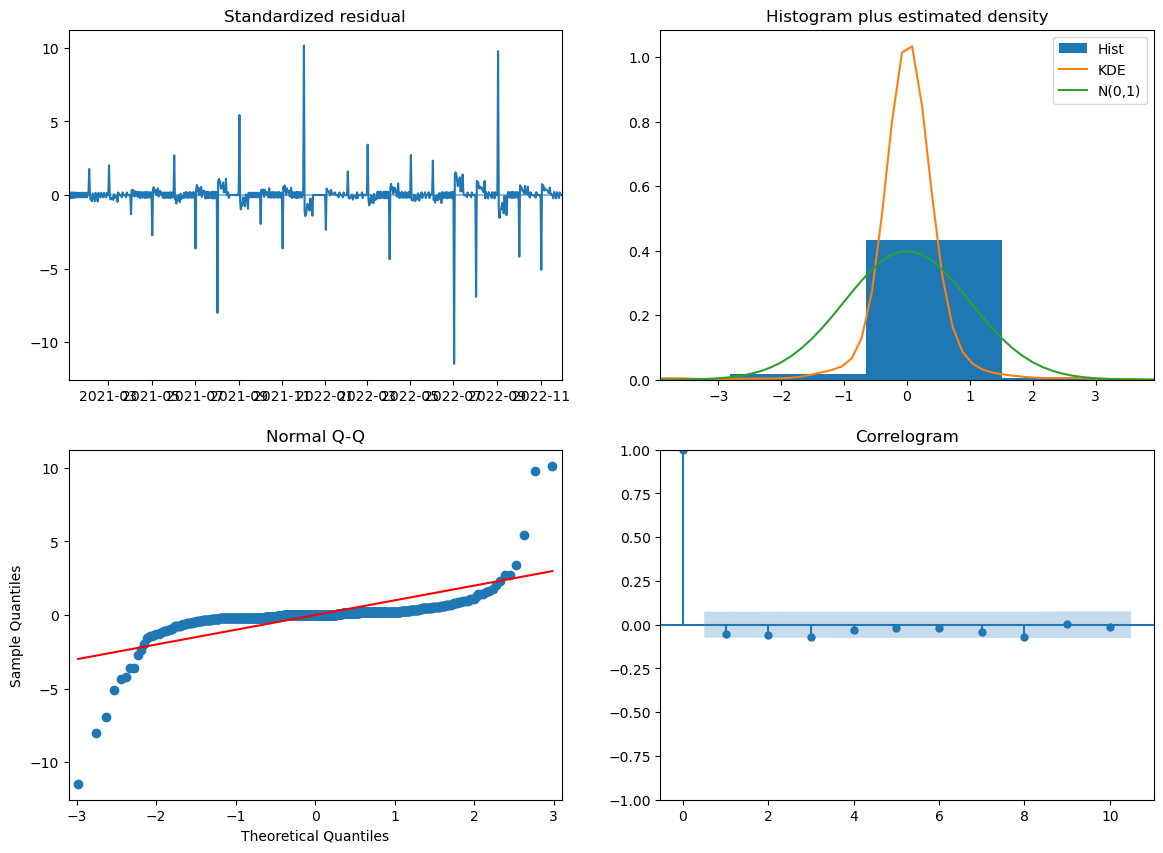

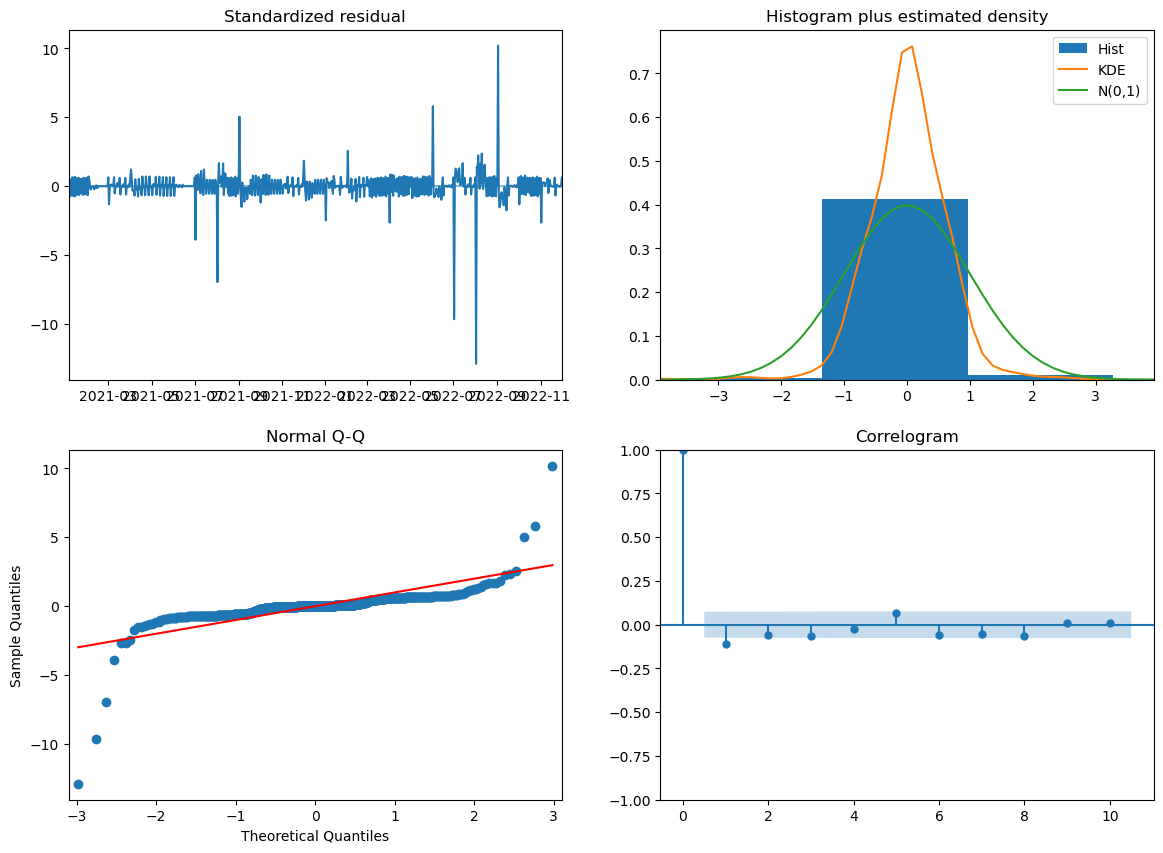

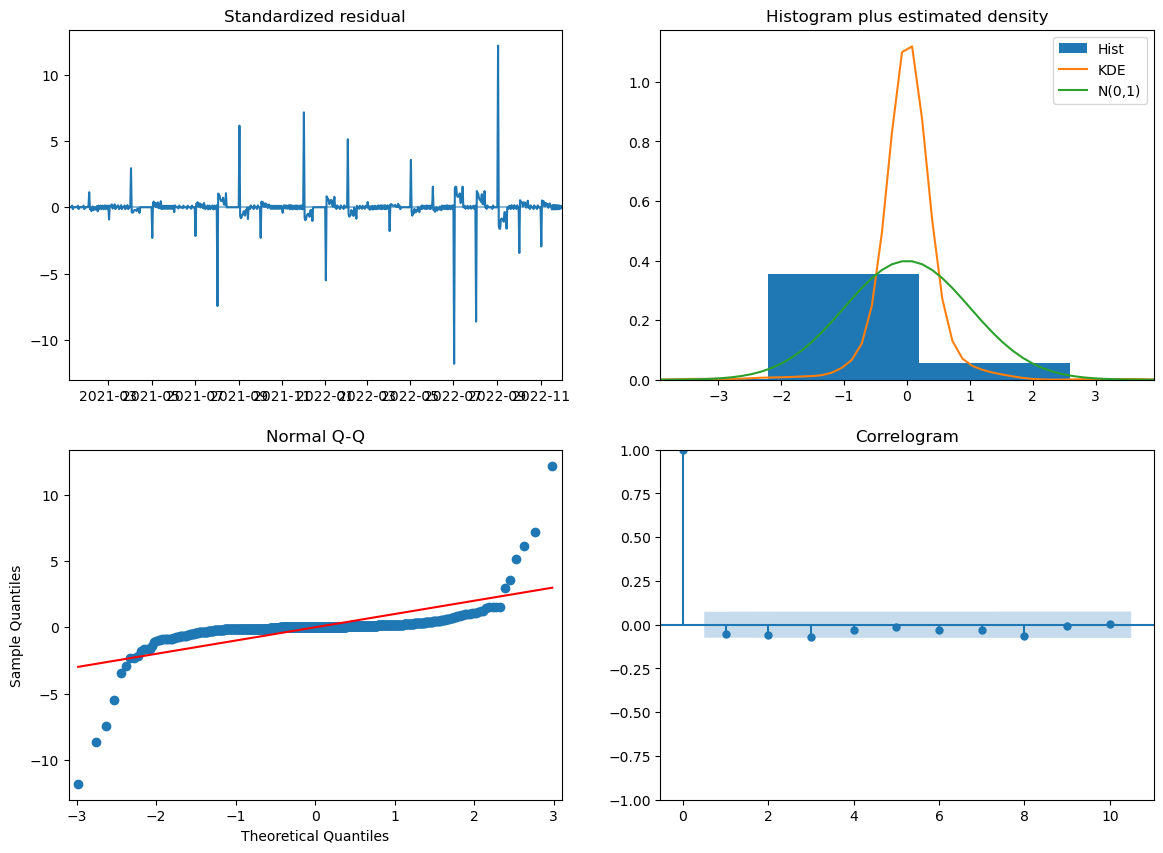

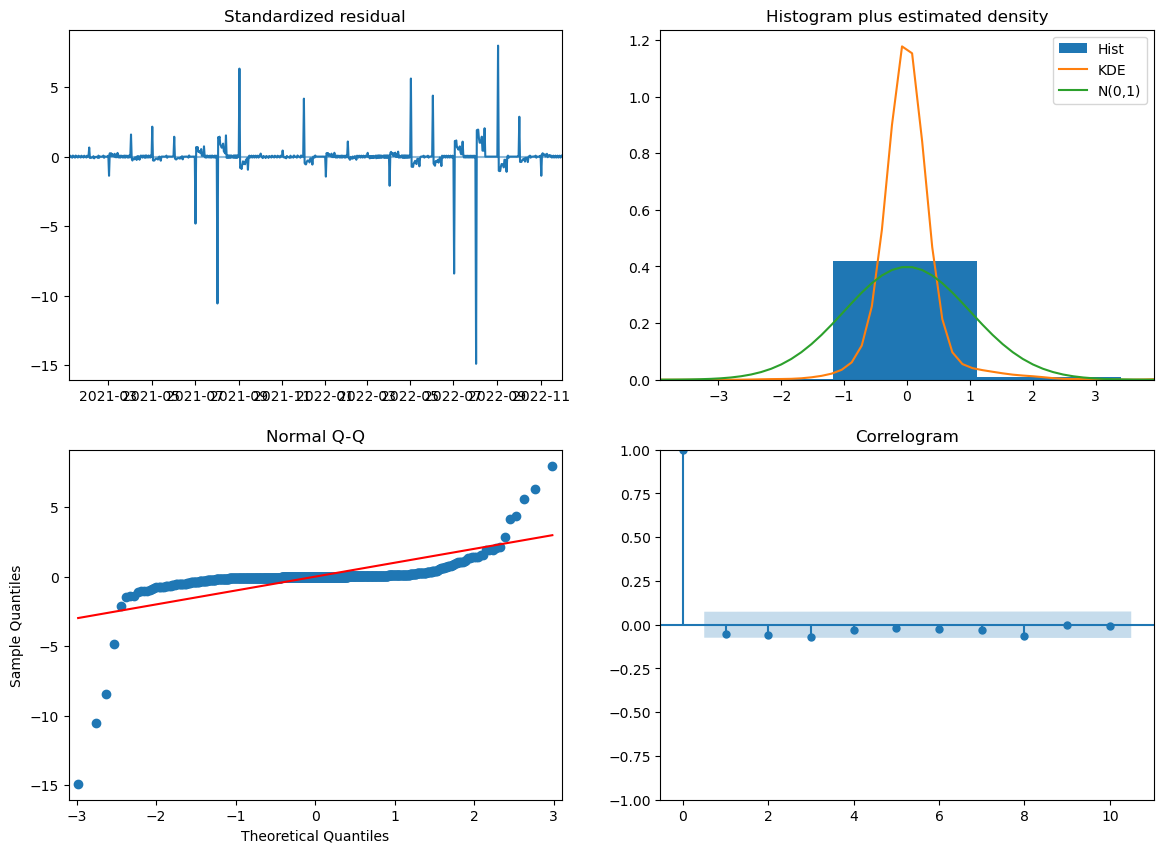

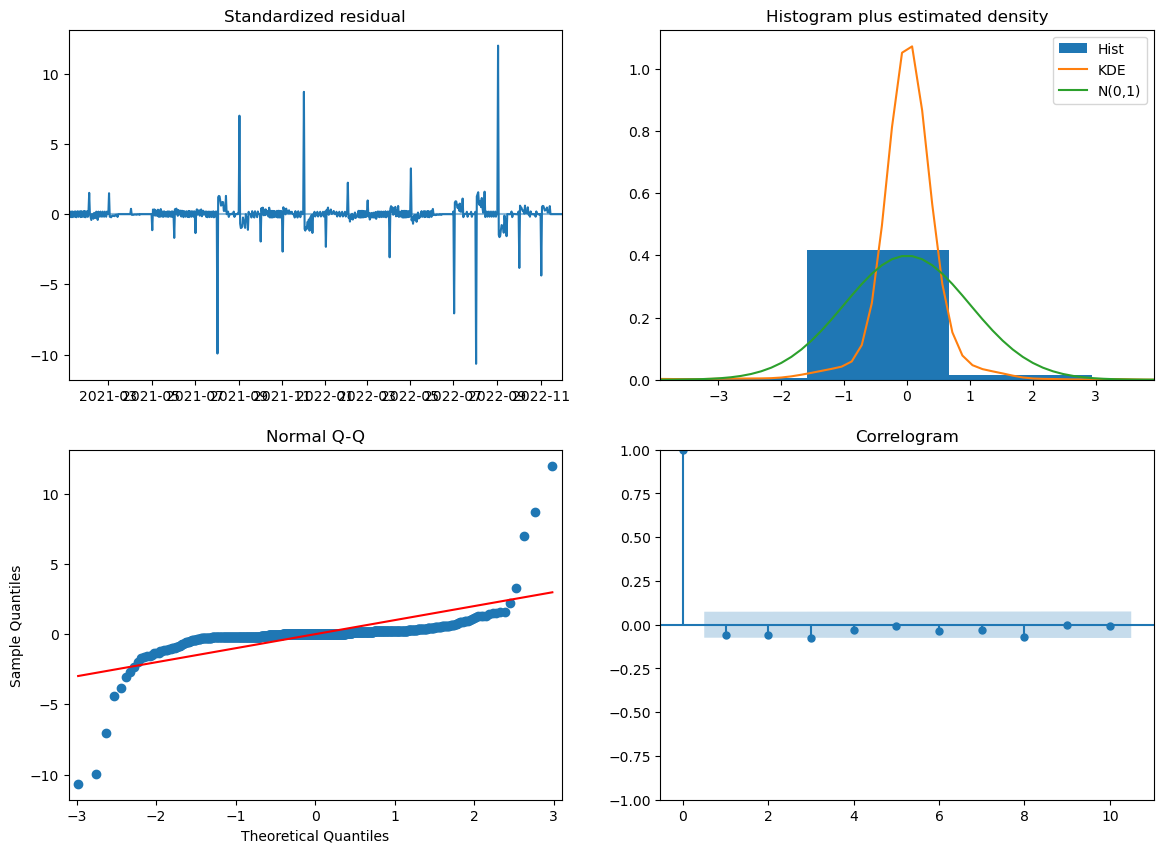

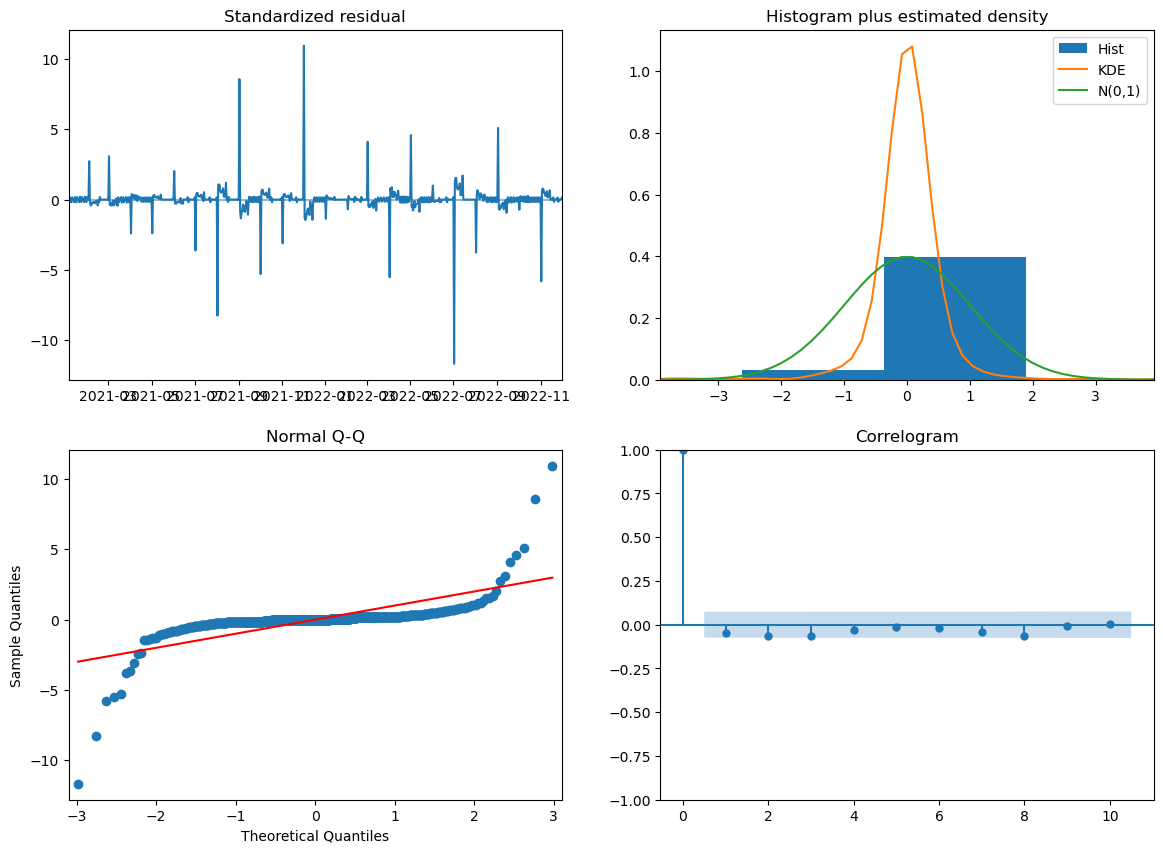

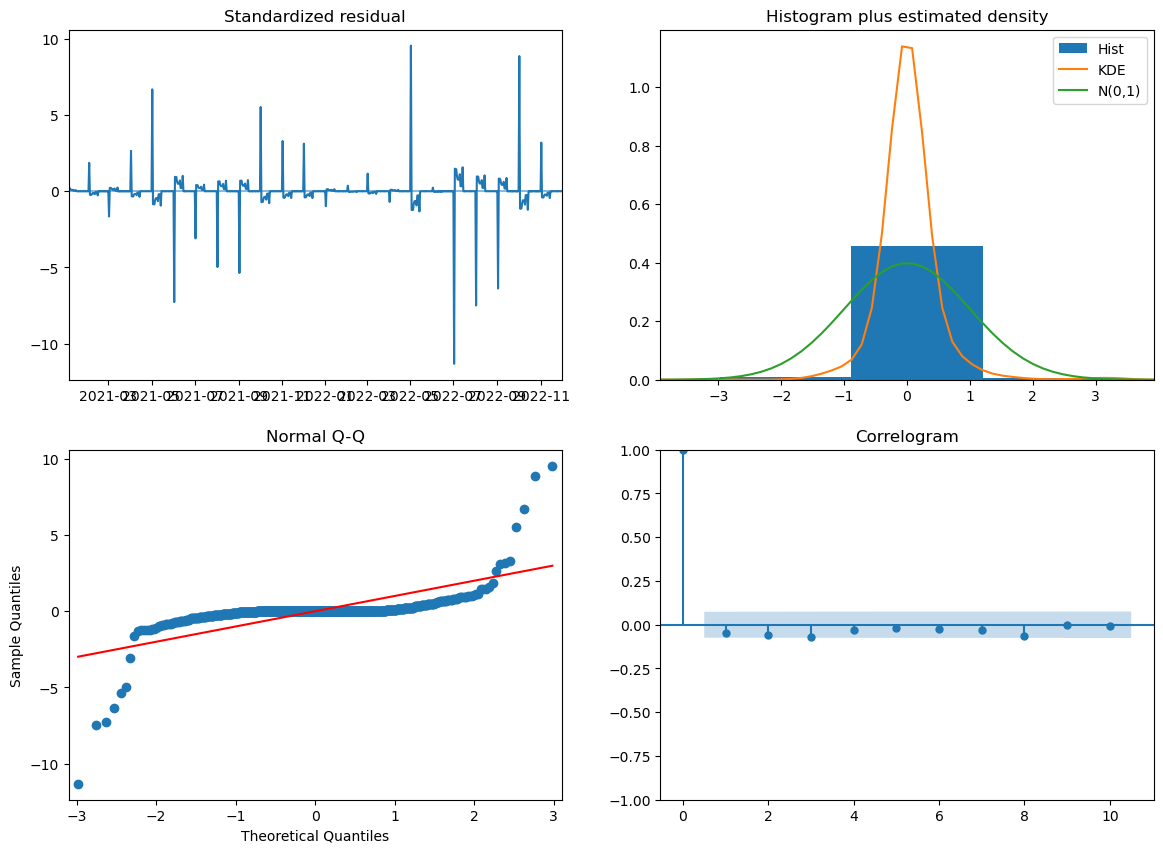

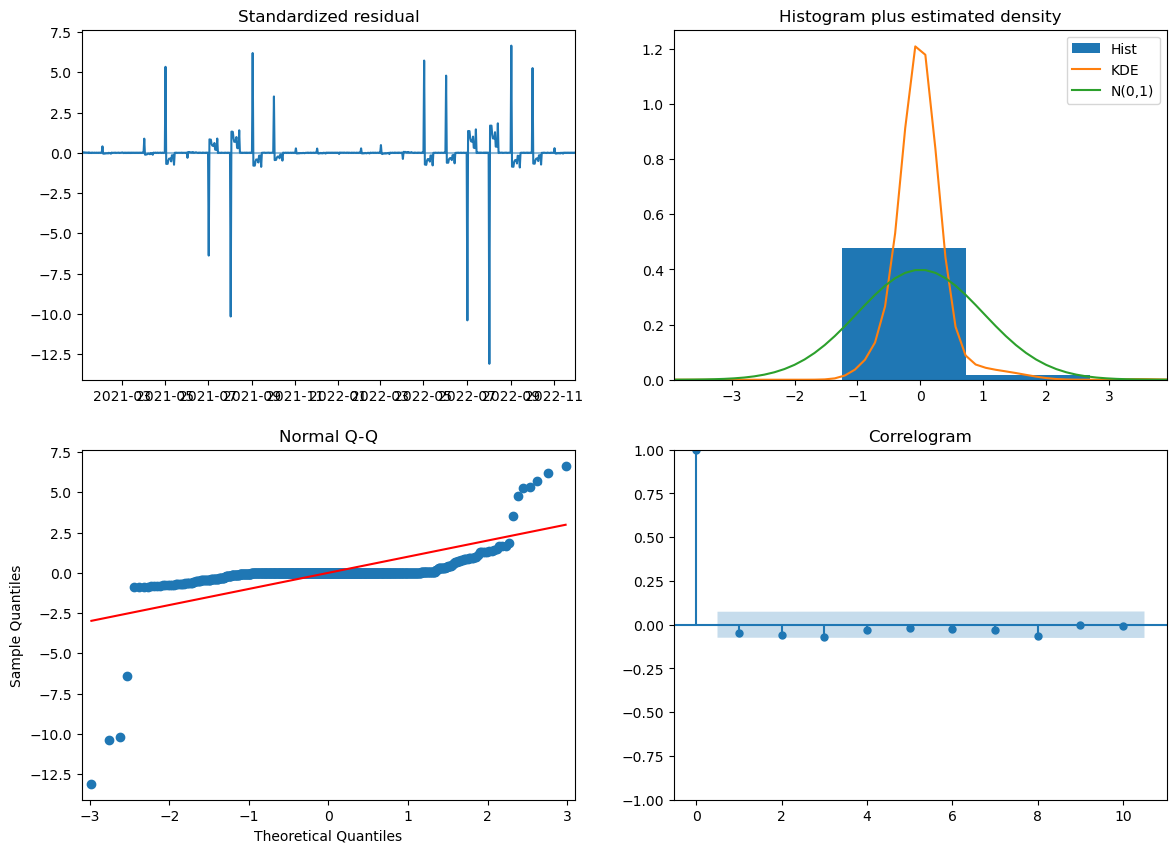

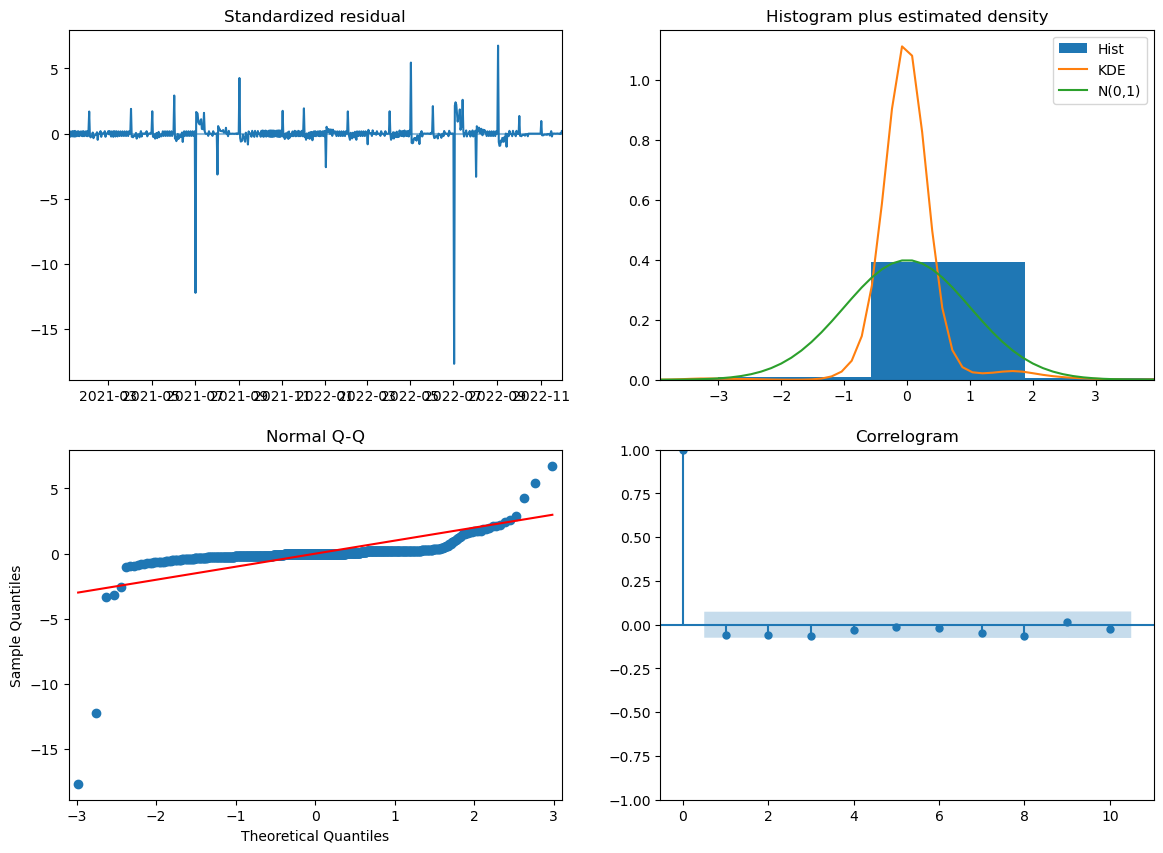

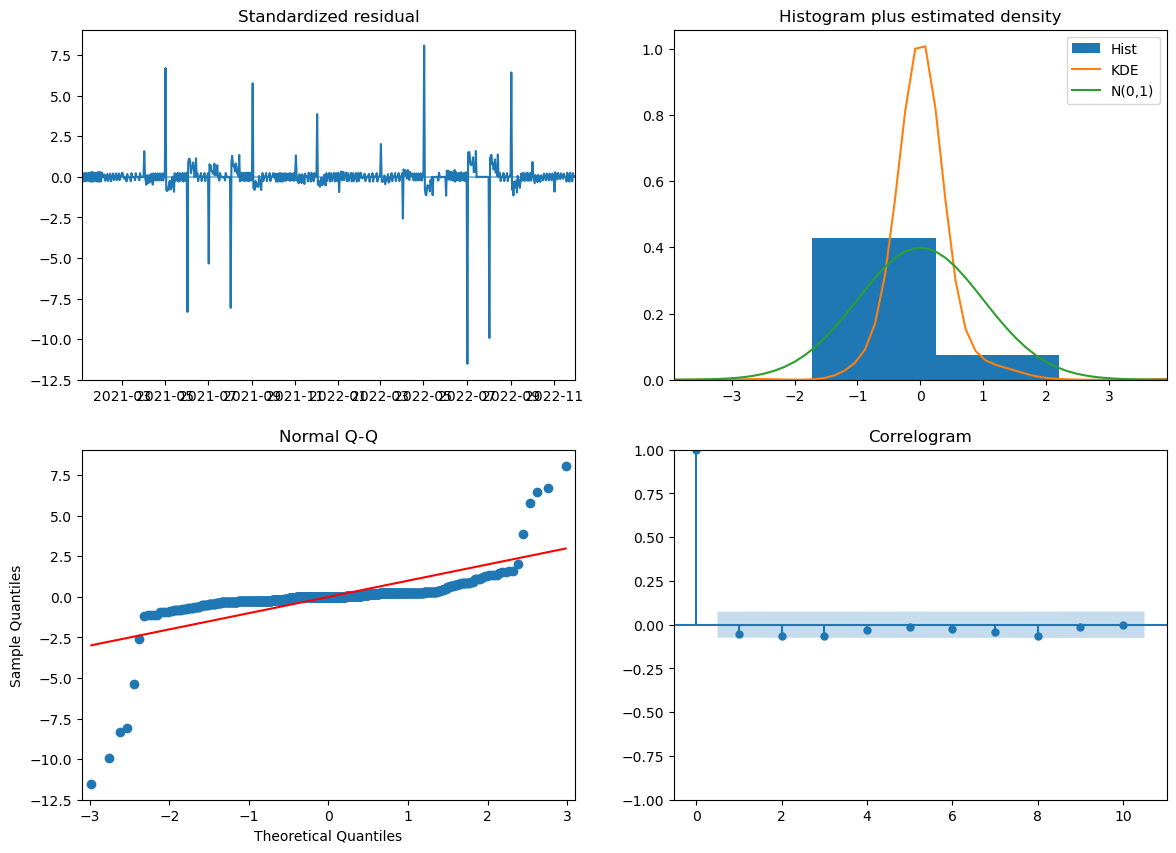

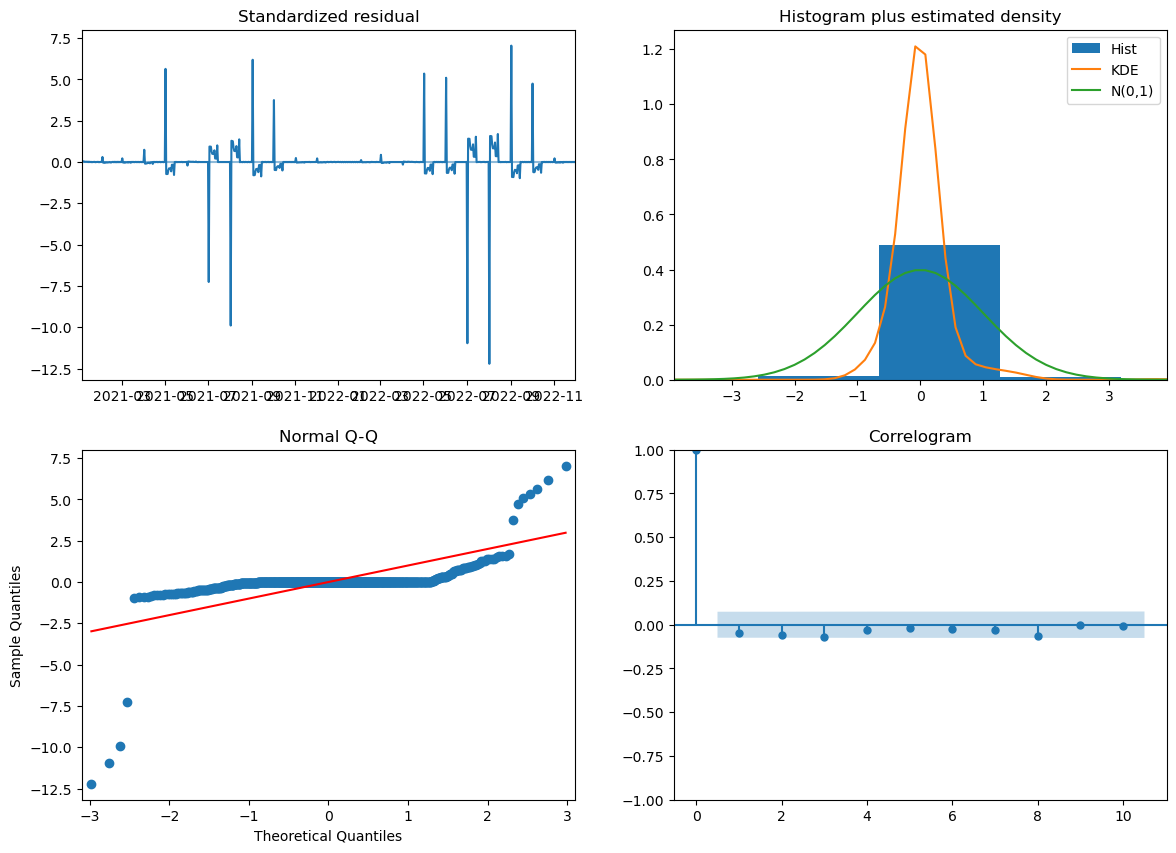

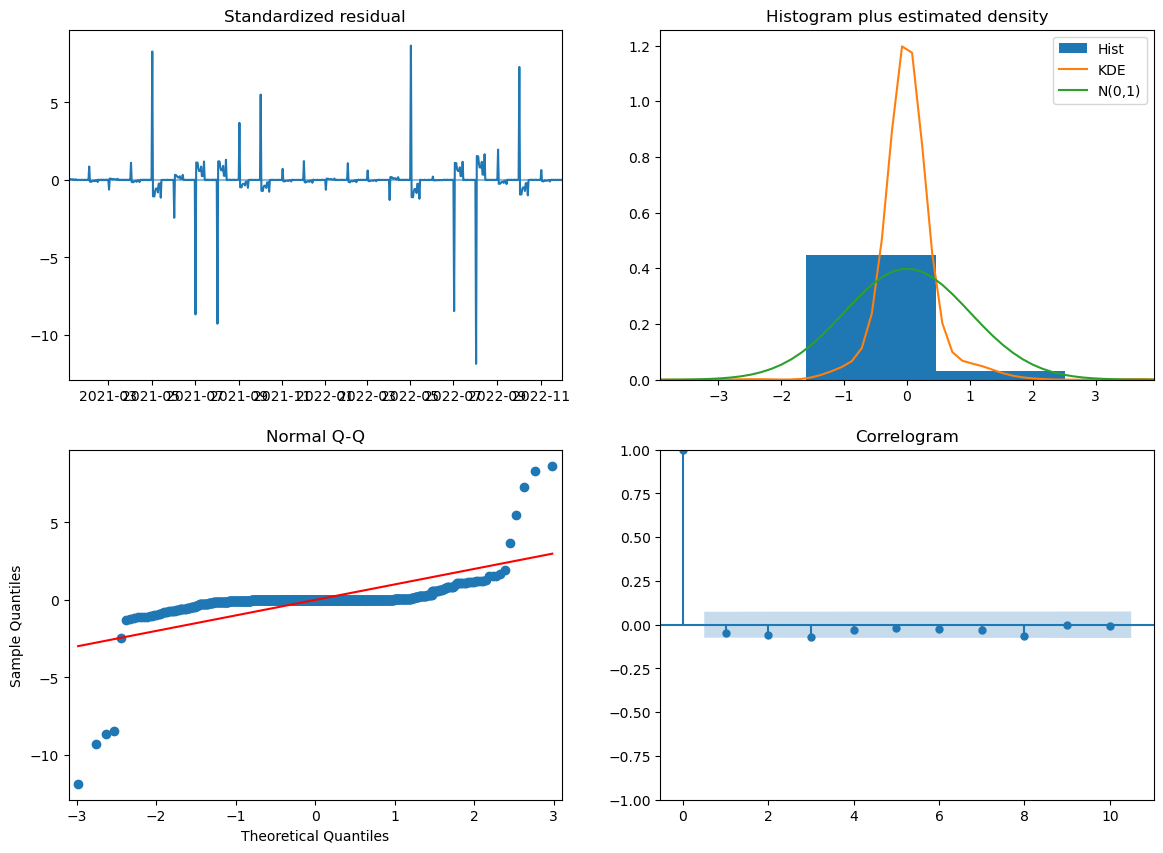

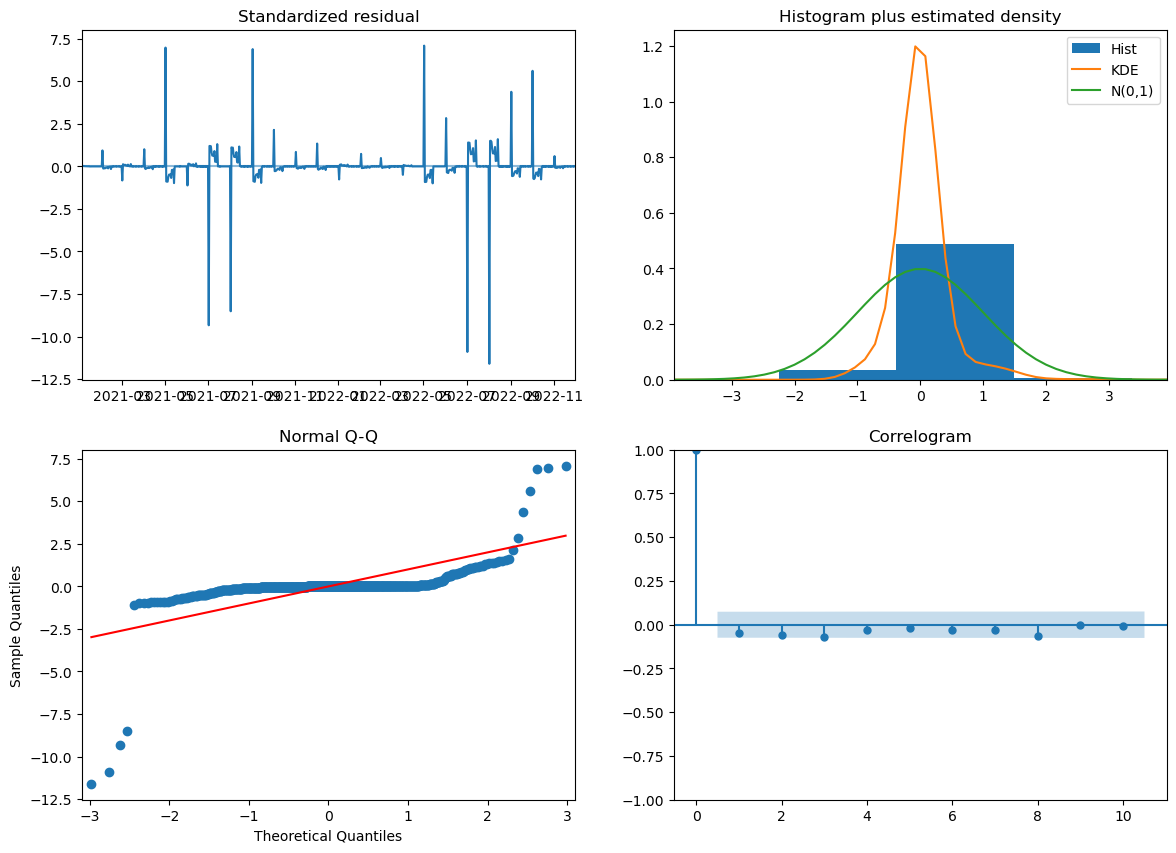

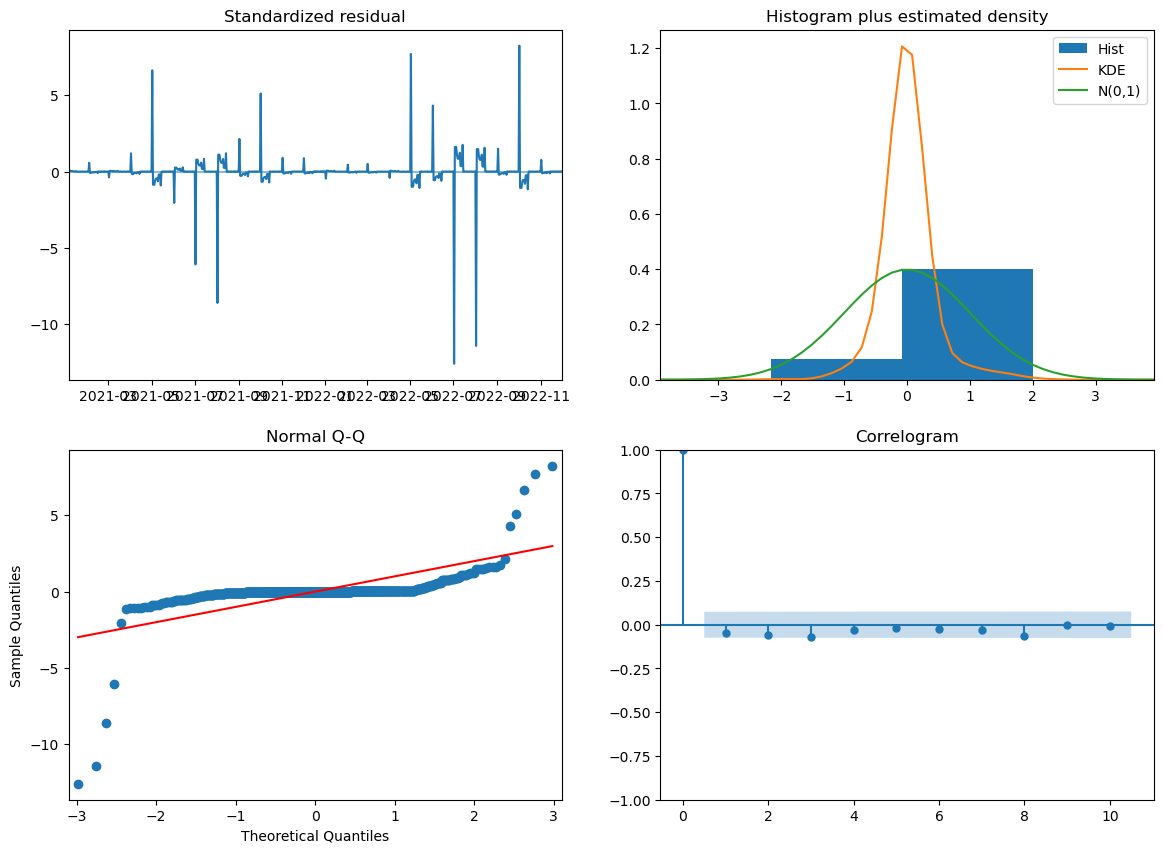

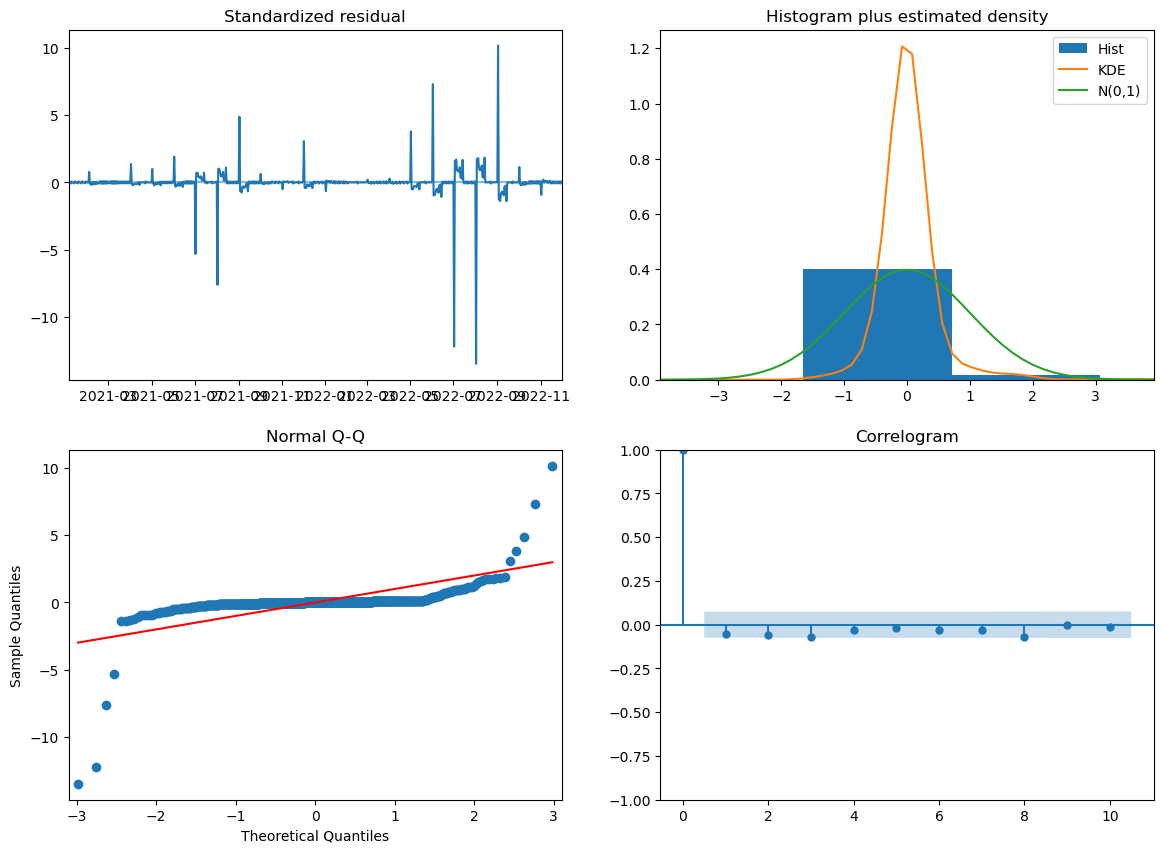

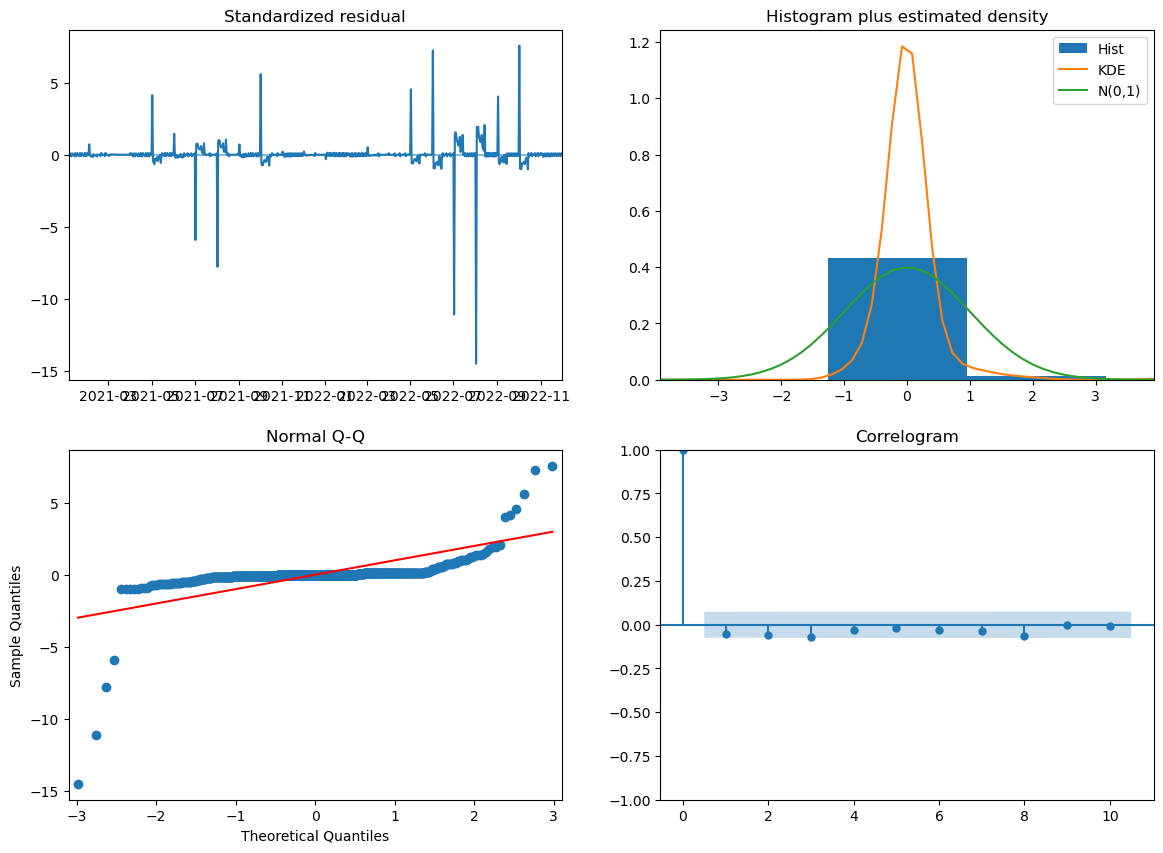

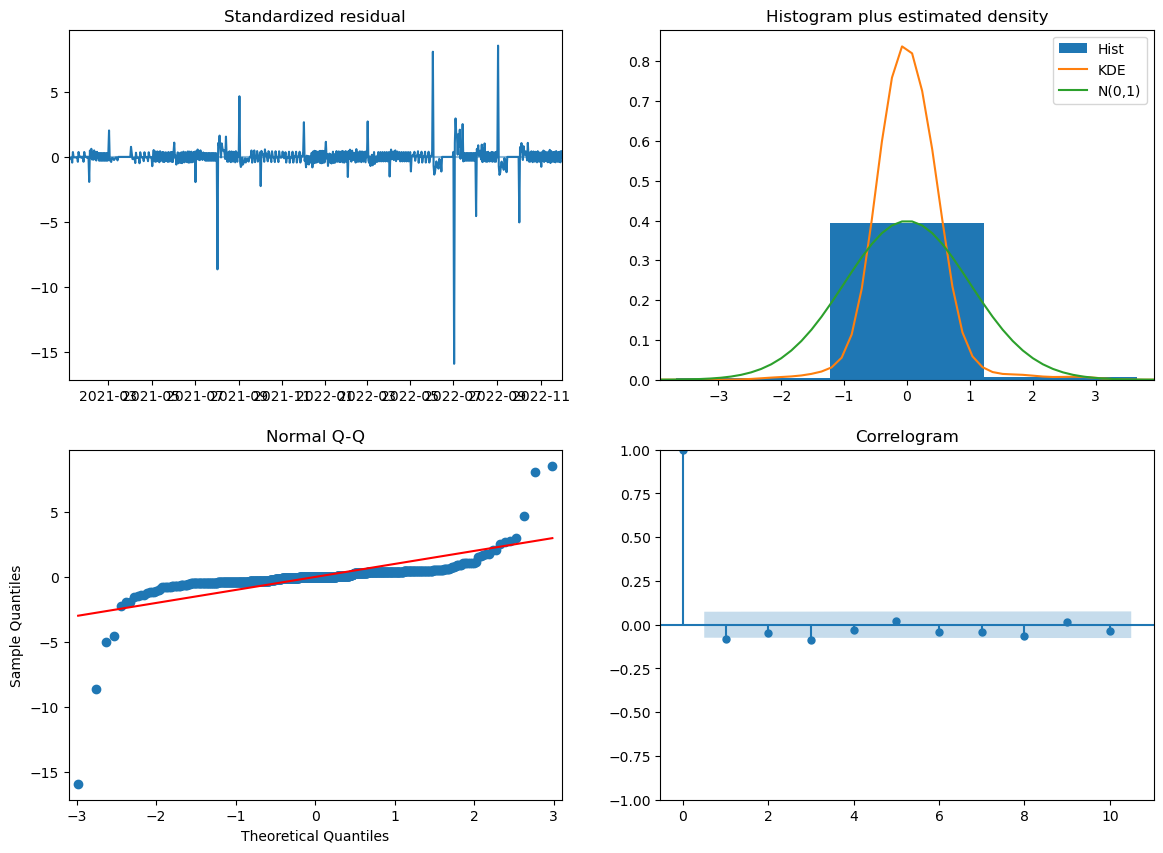

In [139]:
for model in models:
    model.plot_diagnostics(figsize=(14,10))
    plt.show()

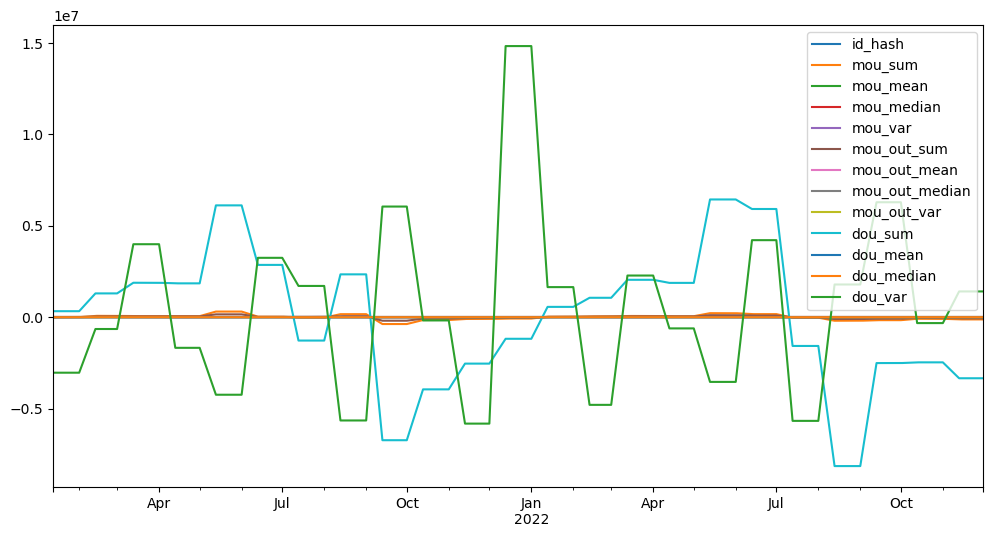

In [140]:
sd_dff_train=X_interpolated[1] - X_interpolated[1].shift(12)
sd_dff_train = sd_dff_train.dropna()
sd_dff_train.plot(figsize=(12,6))
plt.show()

In [141]:
forecasts = []
confints = []
predictions = []
period_indexes = []
for model in models:
    prediction, confint = model.predict(n_periods = (185),
                                    return_conf_int = True) #95% CI default
    period_index = pd.period_range(start = df.index[-1],
                                   periods = 185,
                                   freq='D')
    forecast = pd.DataFrame({'Predicted item_cnt_month': prediction.round()},
                            )

    forecasts.append(forecast)
    confints.append(confint)
    predictions.append(prediction)
    period_indexes.append(period_index)
print(len(forecasts), len(confints), len(predictions), len(period_indexes), len(X_interpolated))
predictions[0]

36 36 36 36 36


2022-12-02     492.127431
2022-12-03     482.399658
2022-12-04     472.835446
2022-12-05     463.413885
2022-12-06     454.128575
                 ...     
2023-05-31    1559.974343
2023-06-01    1581.860070
2023-06-02    1603.922091
2023-06-03    1626.160405
2023-06-04    1648.575014
Freq: D, Length: 185, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



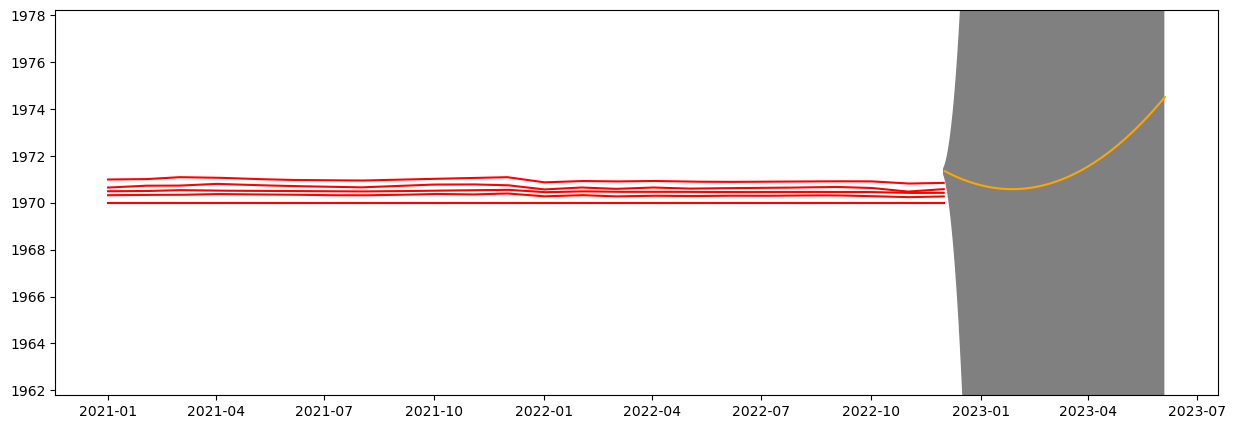

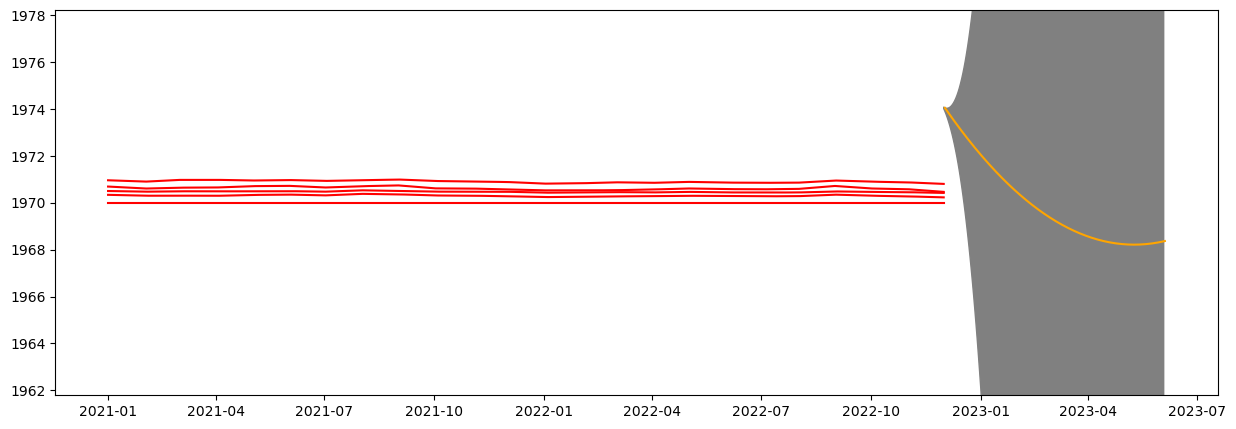

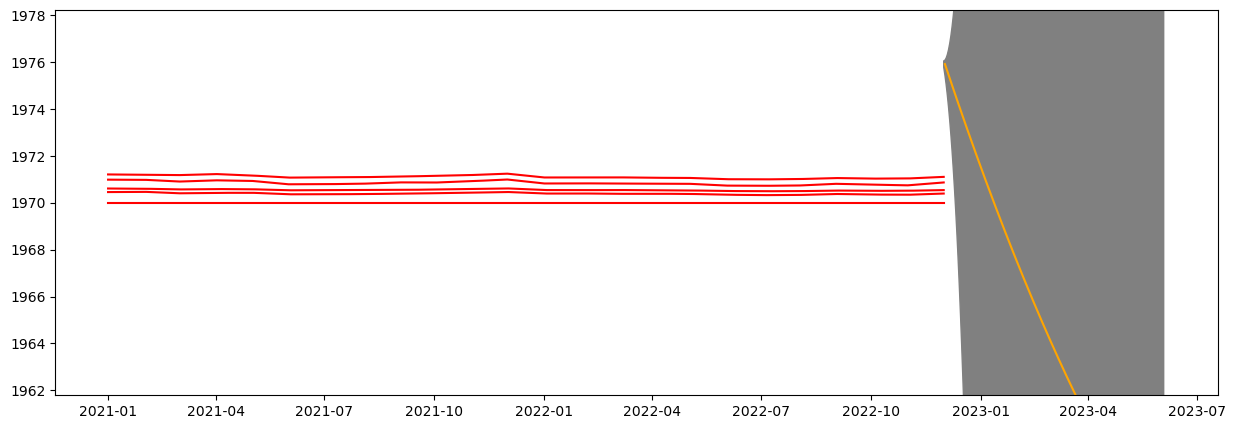

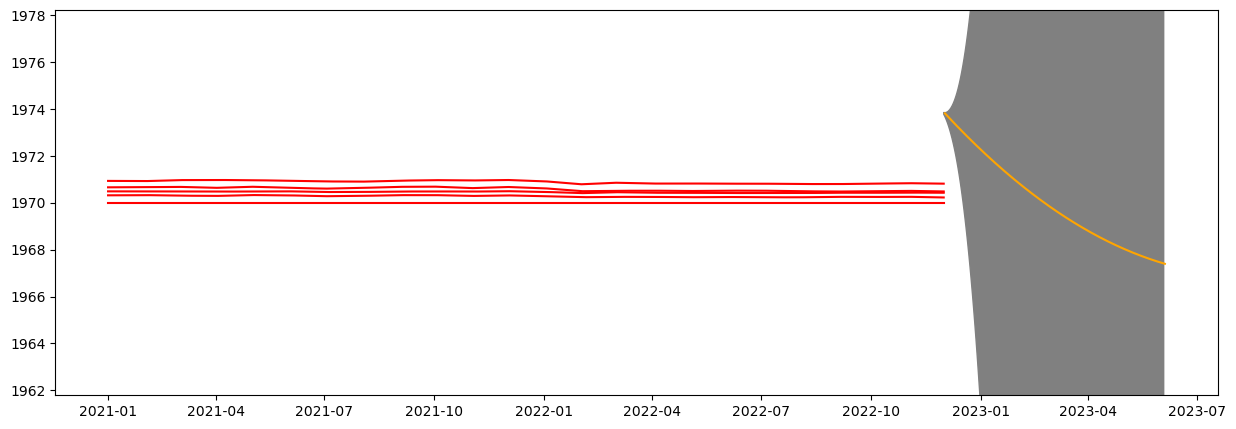

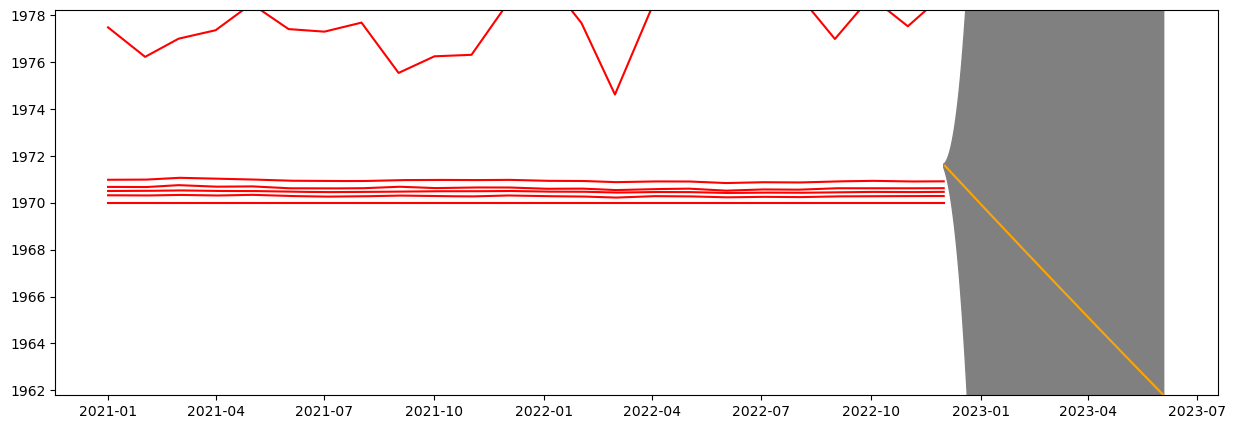

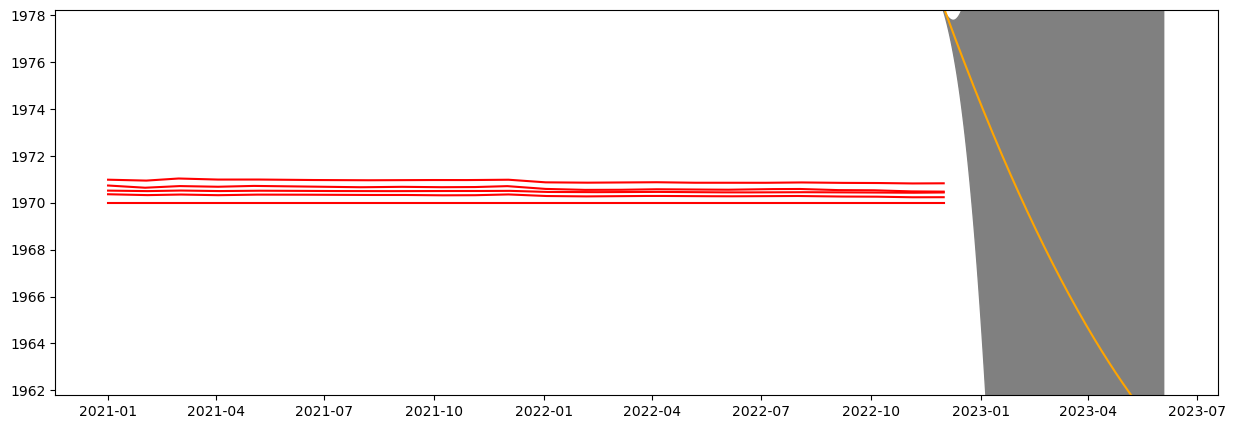

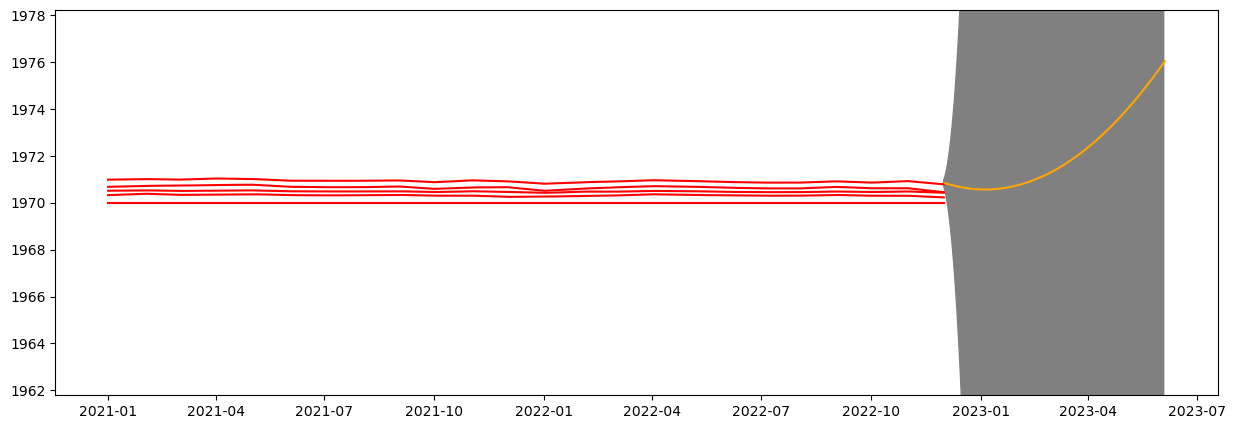

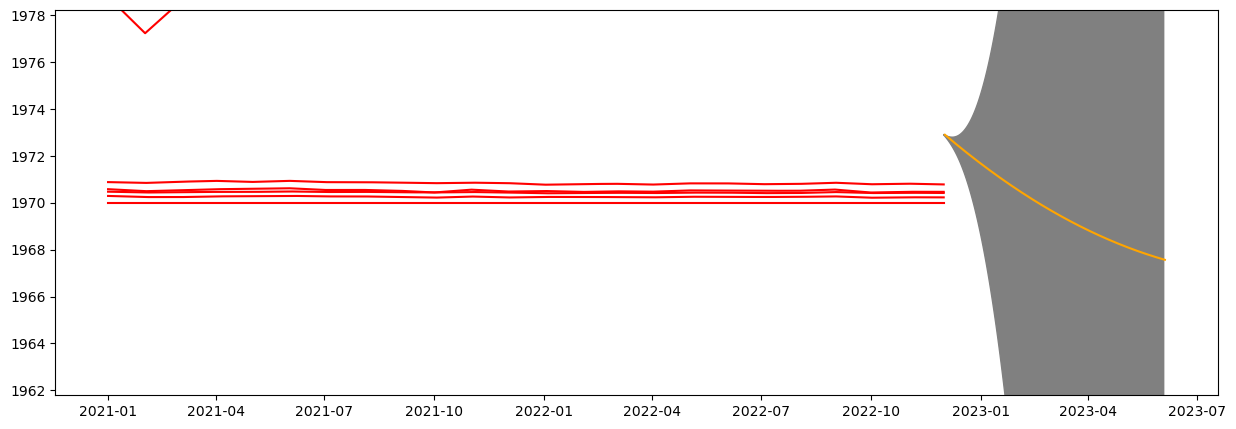

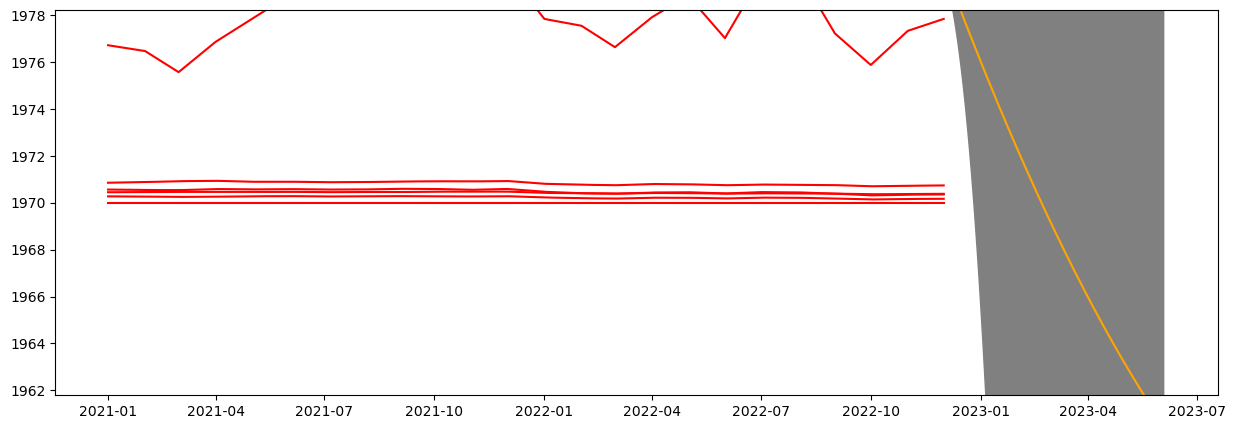

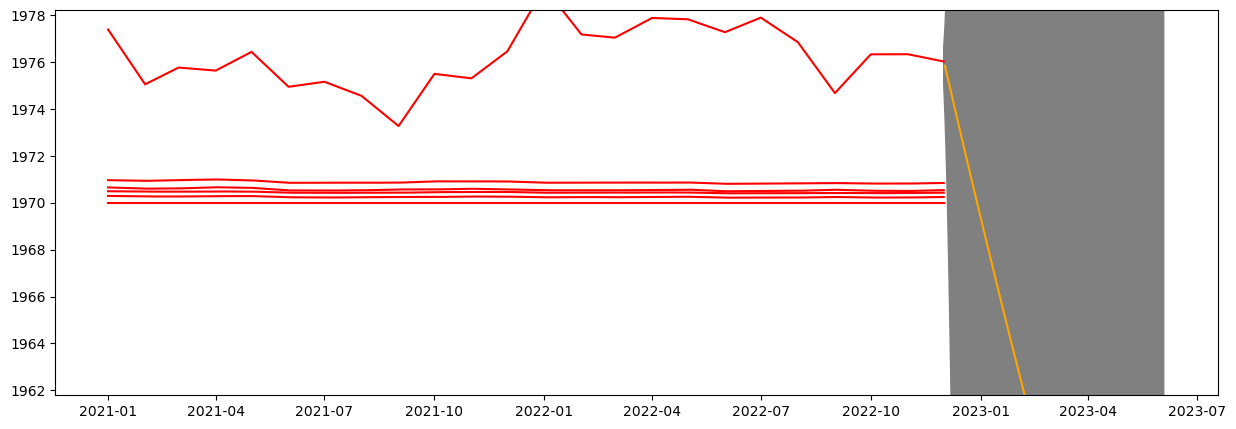

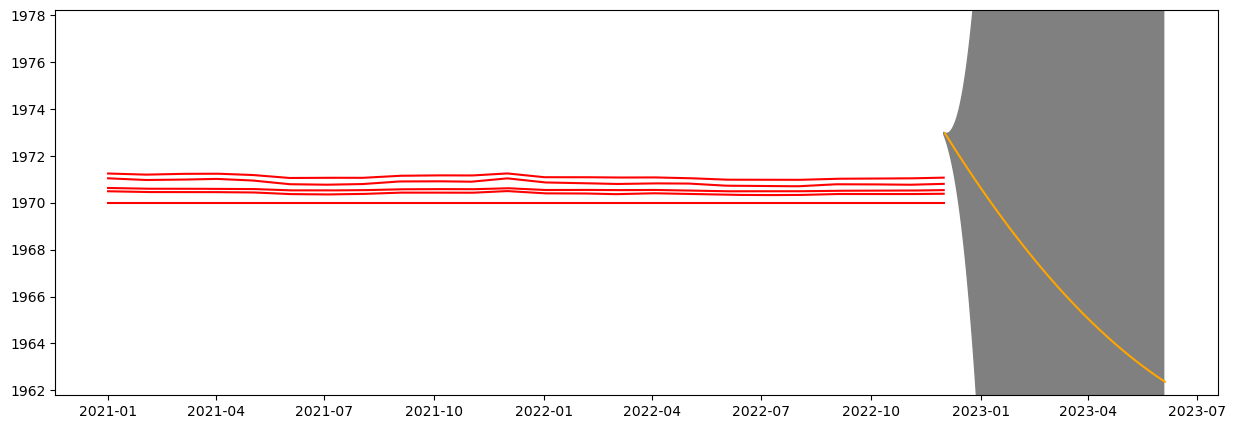

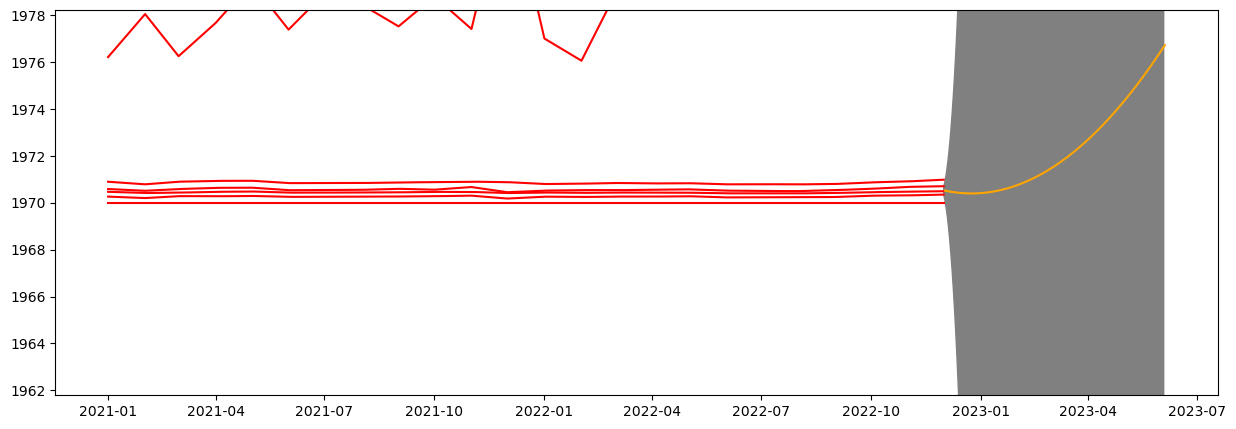

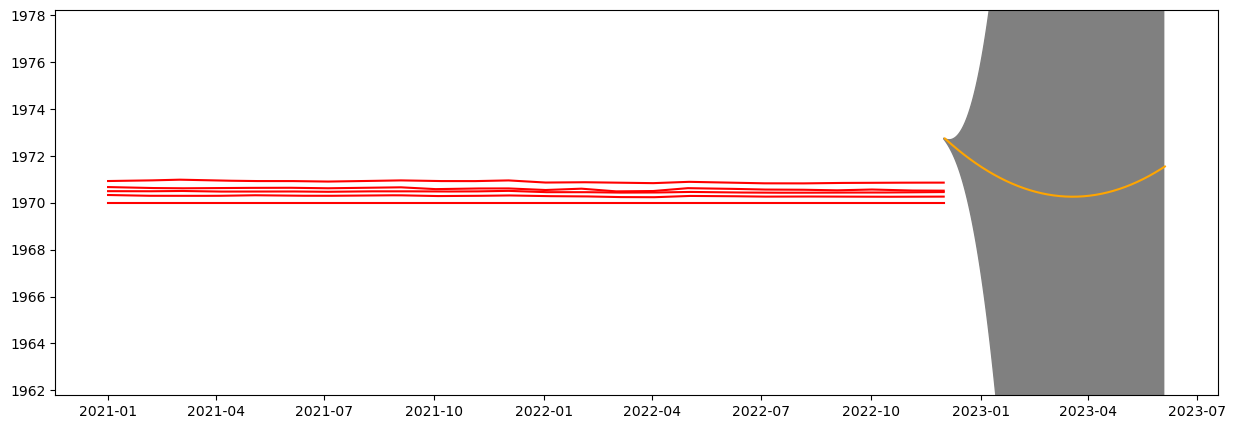

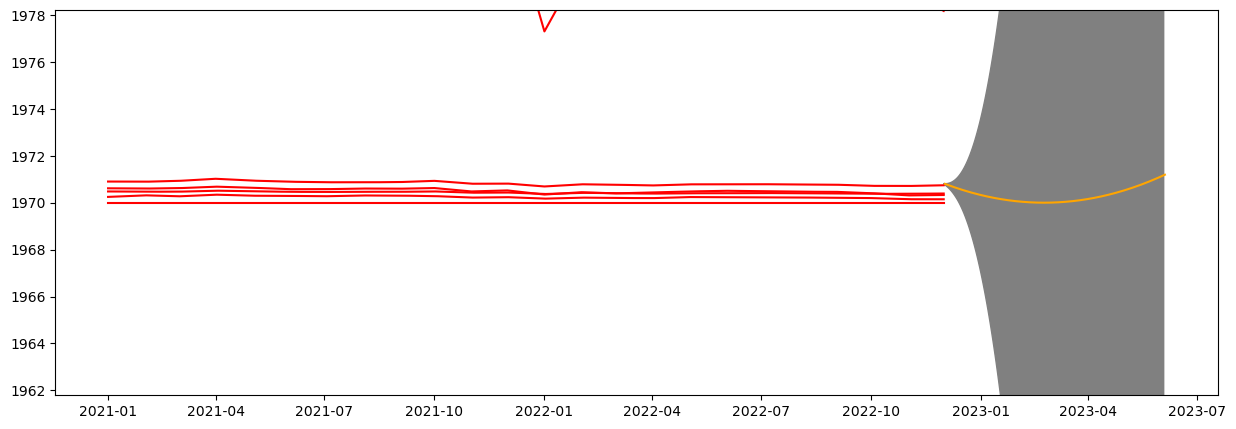

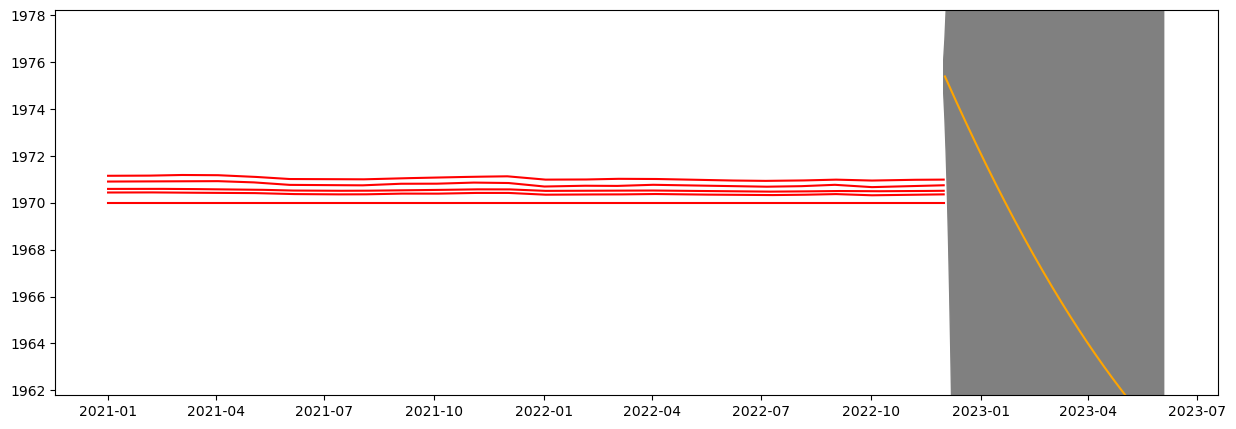

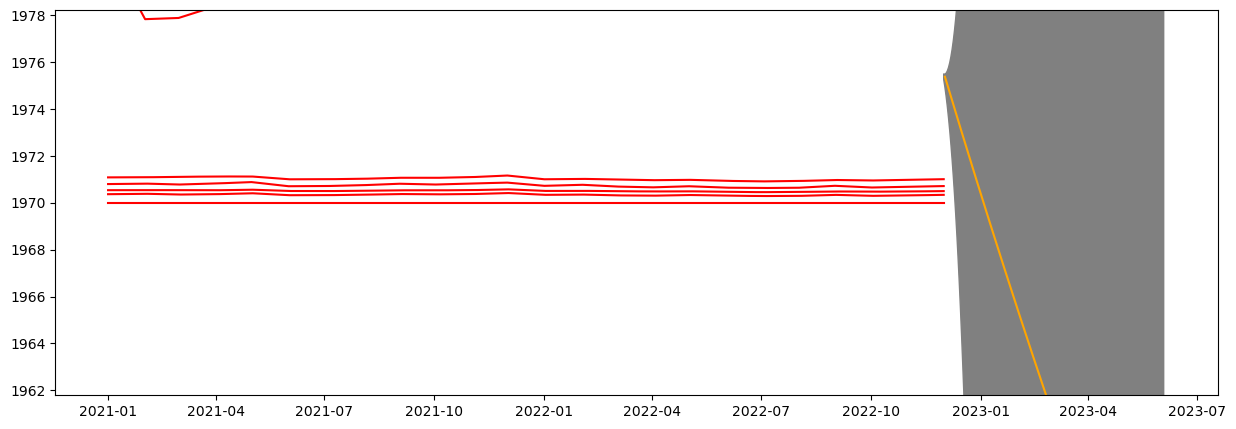

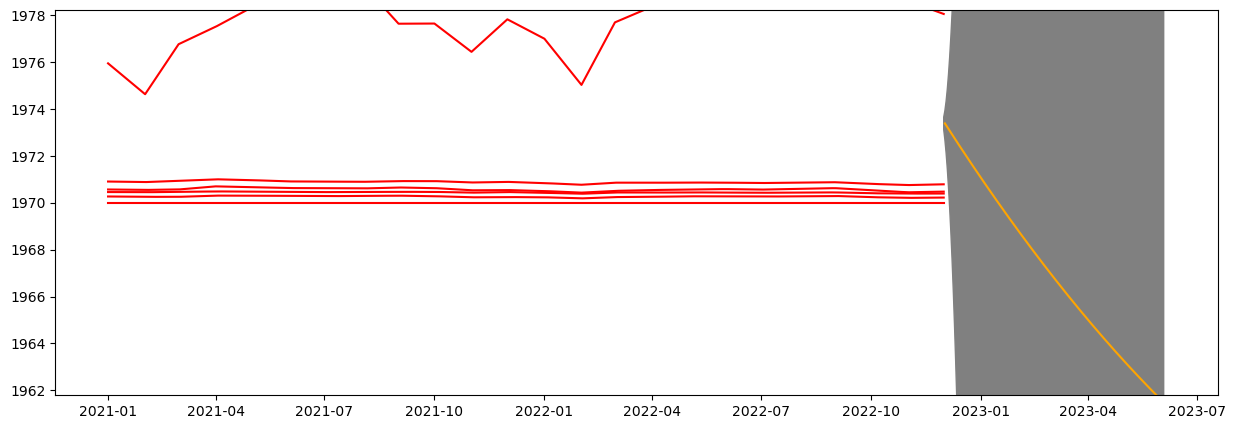

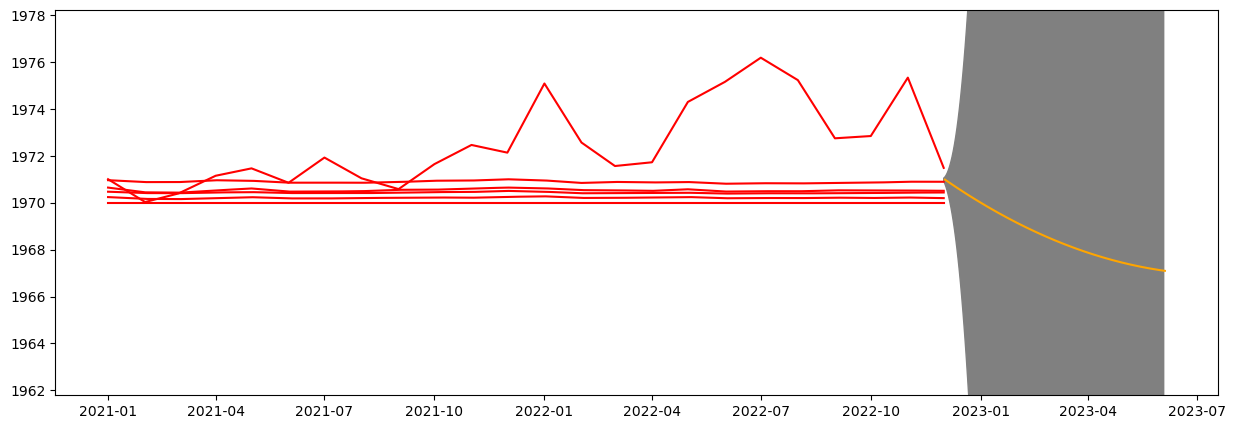

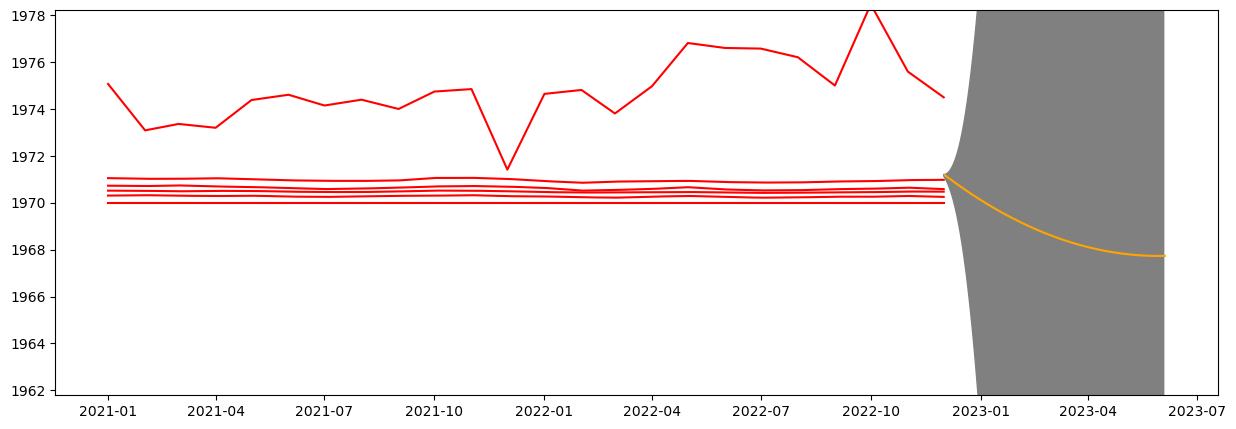

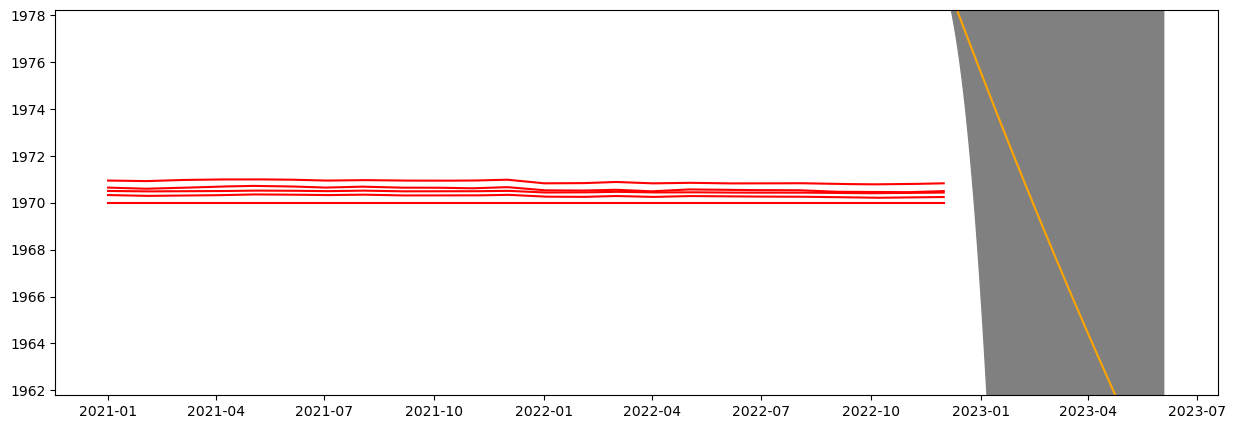

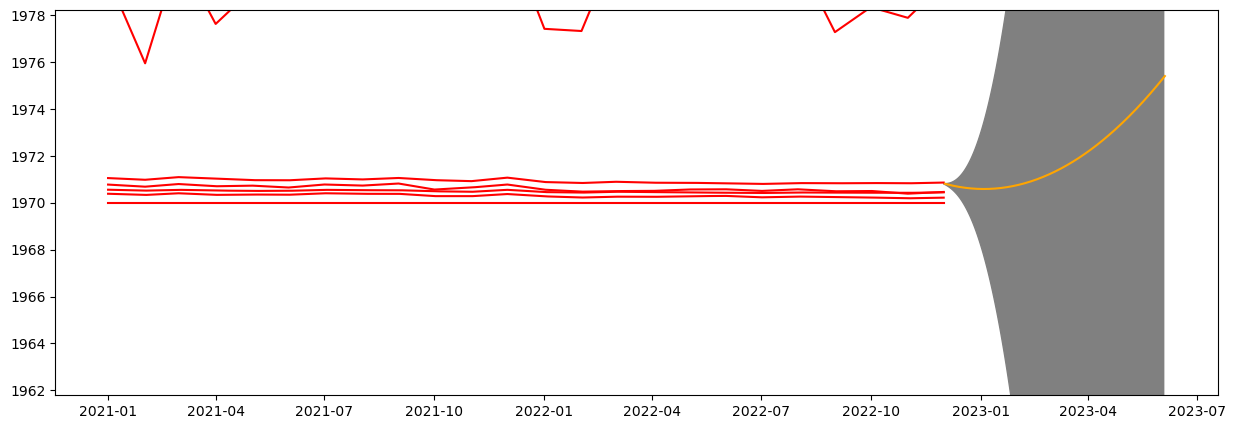

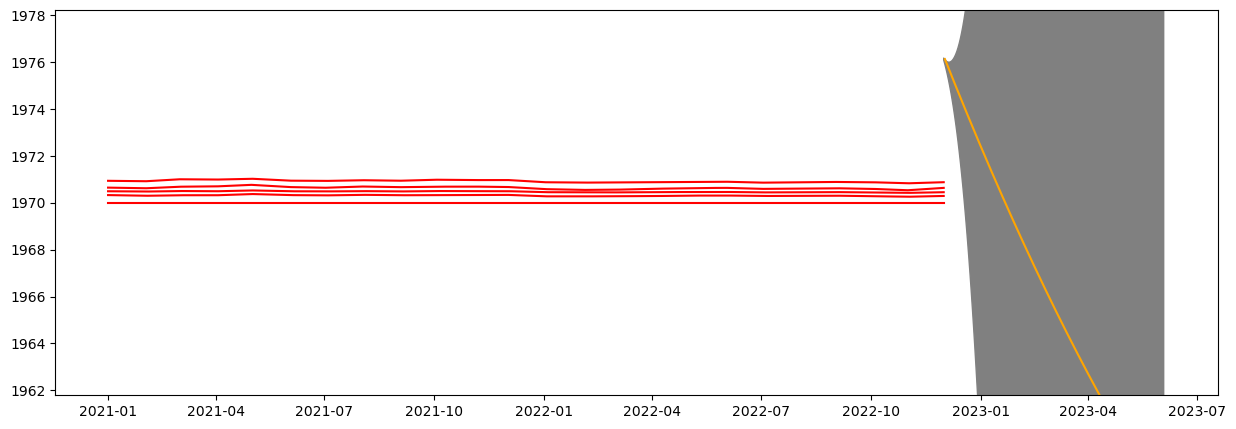

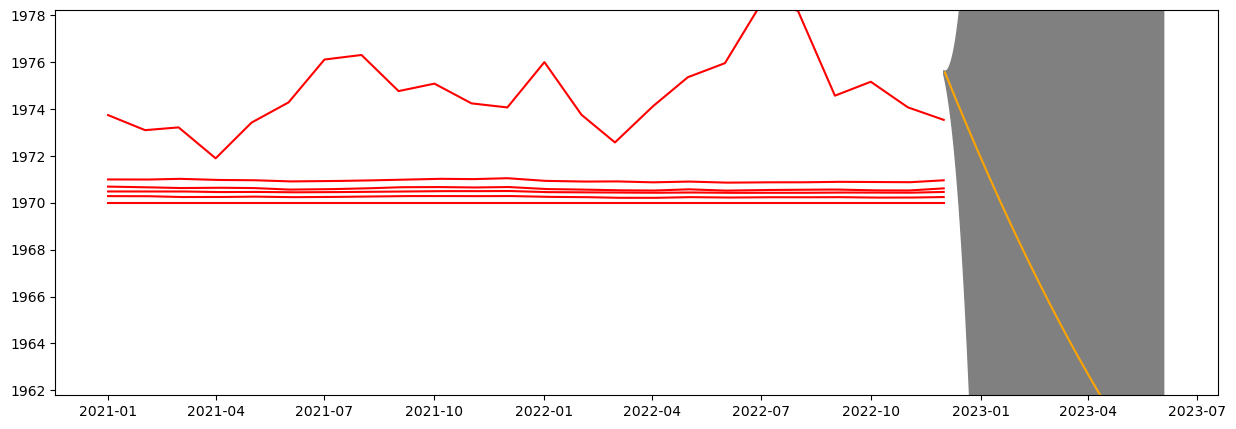

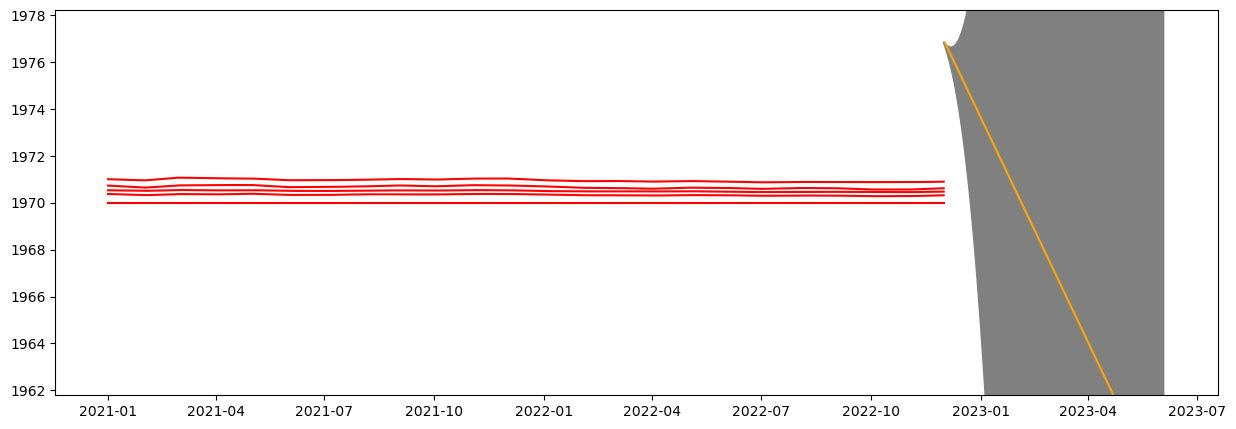

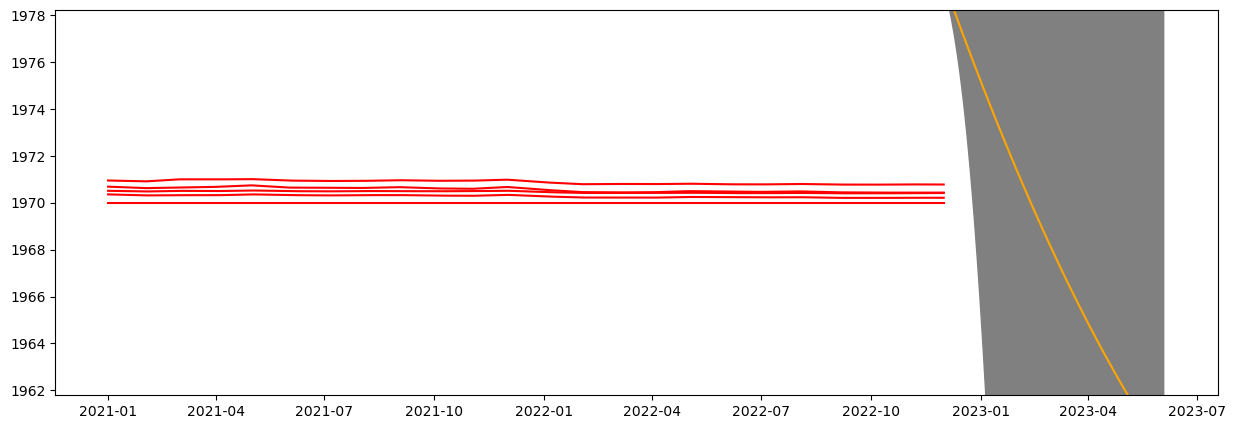

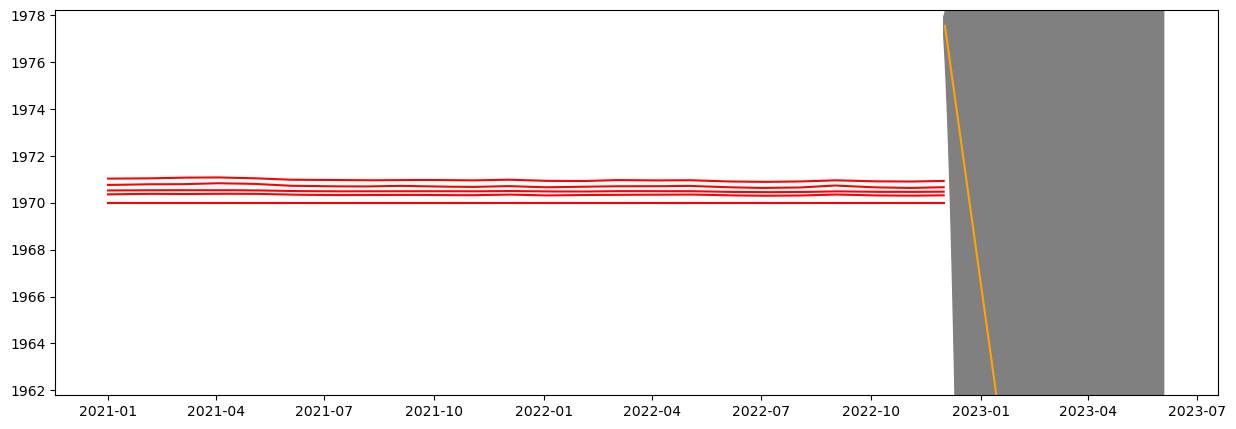

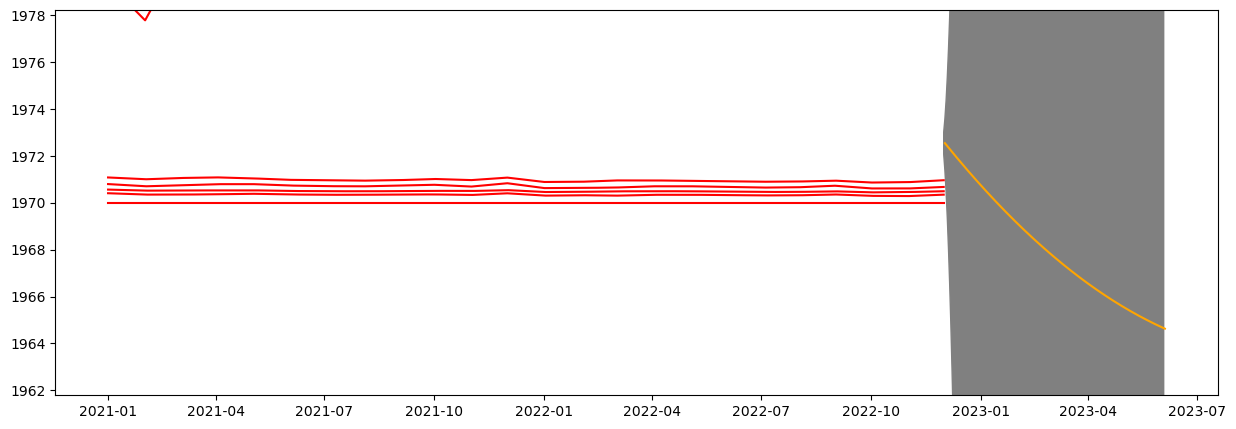

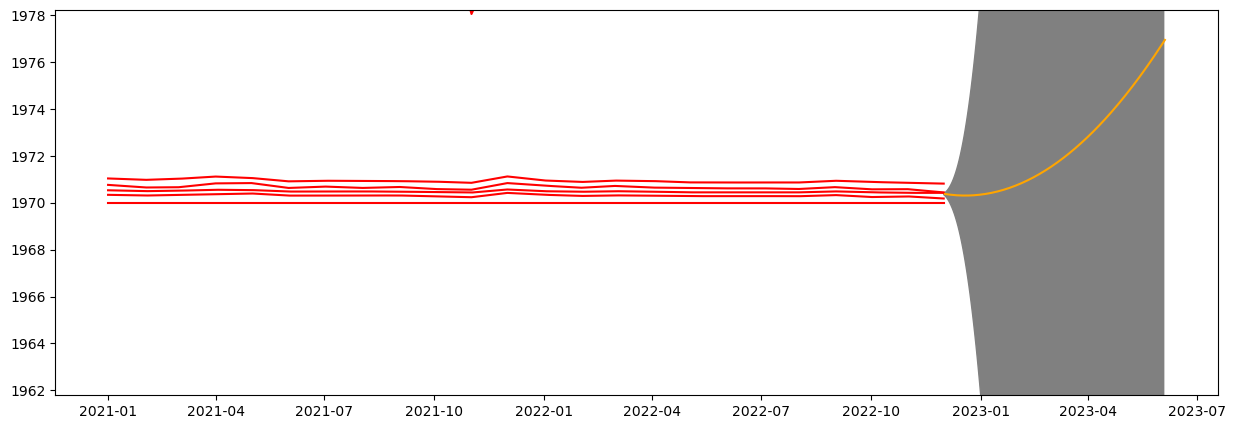

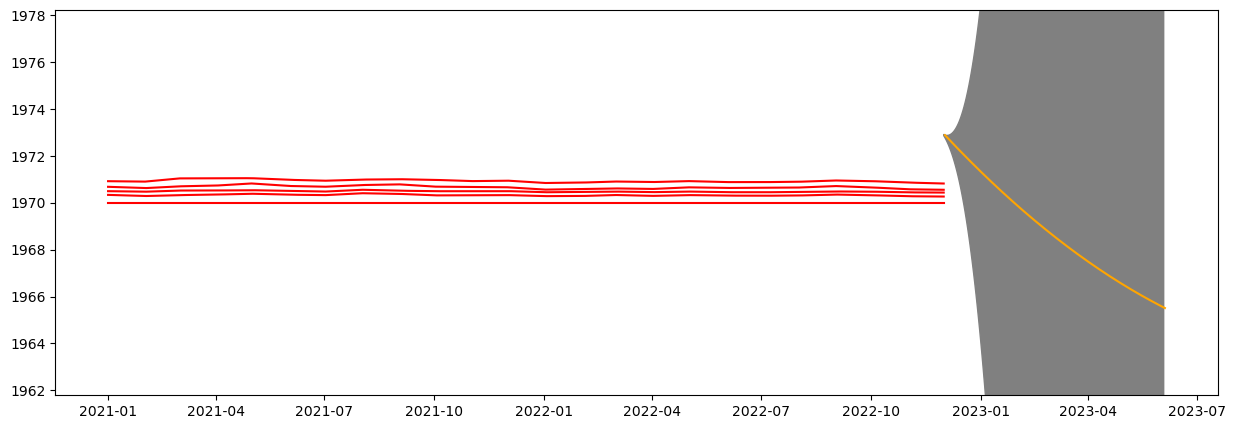

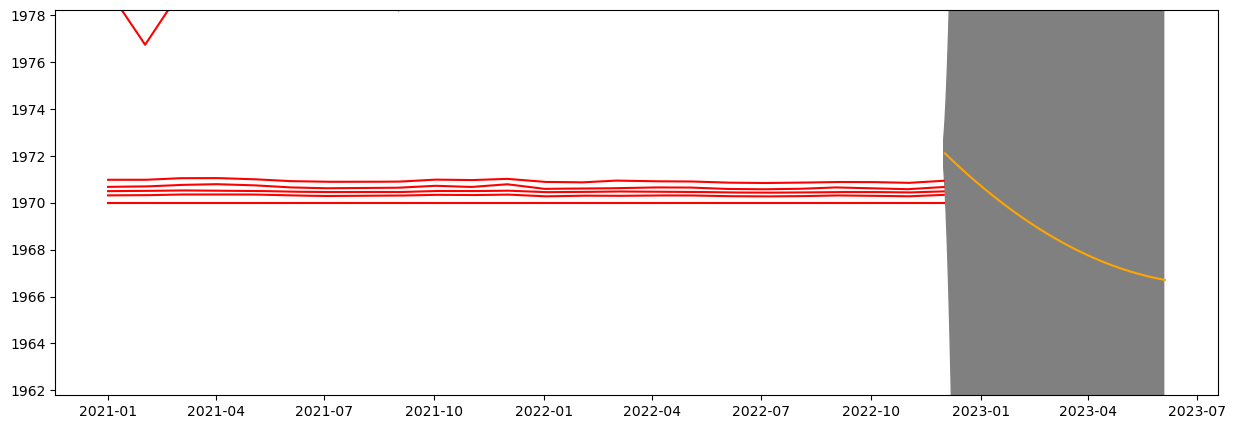

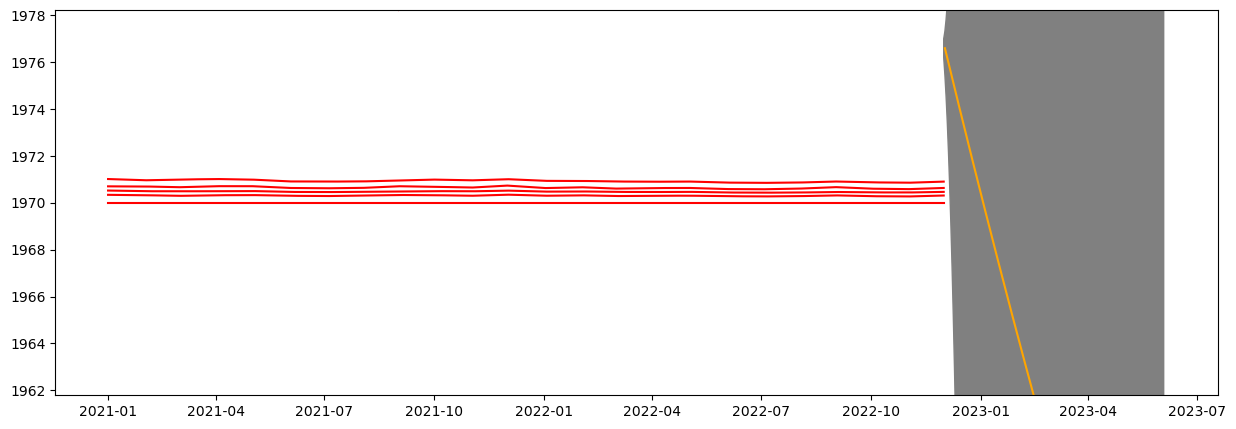

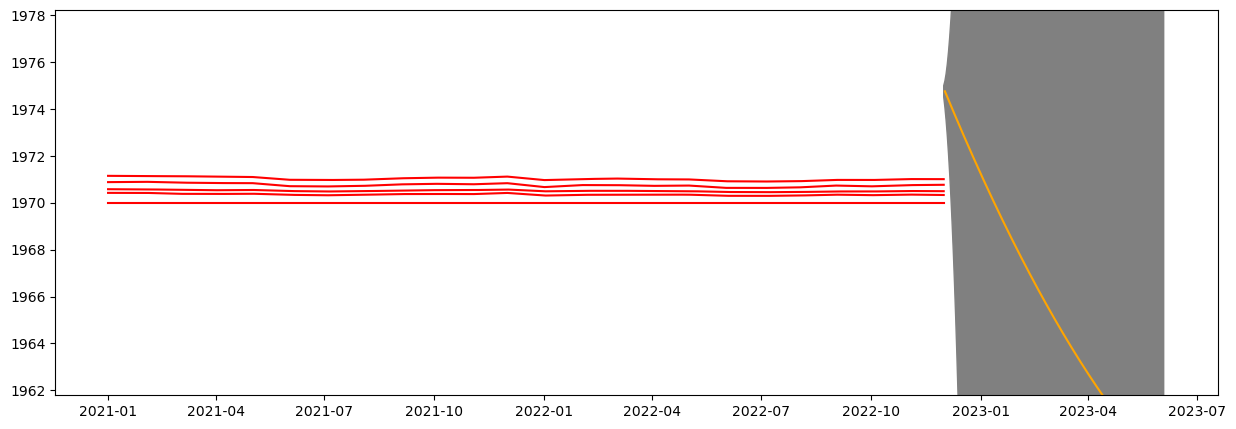

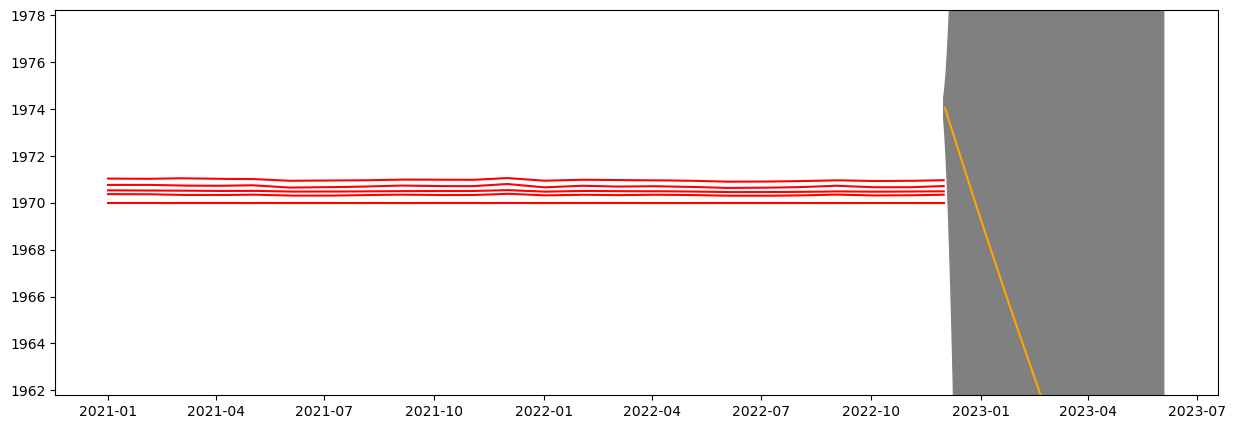

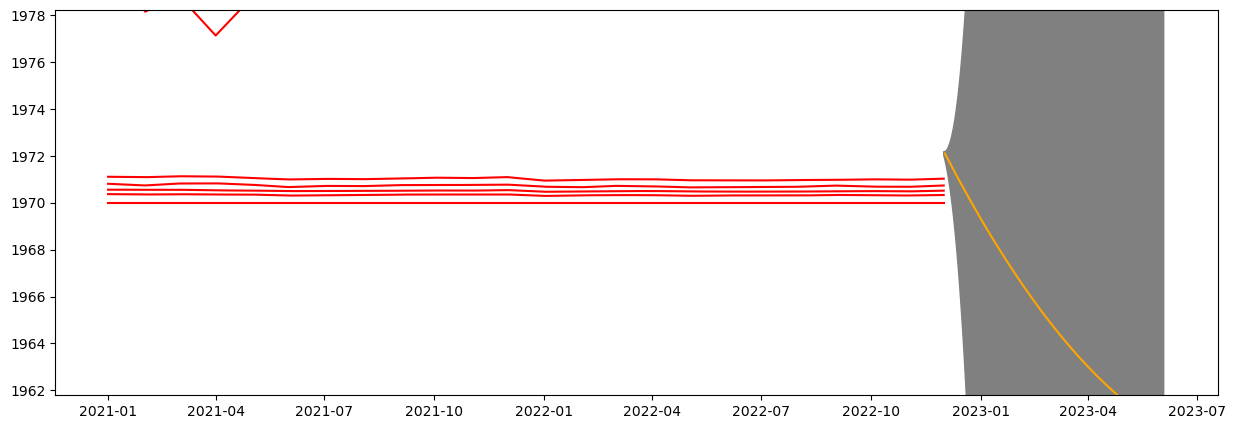

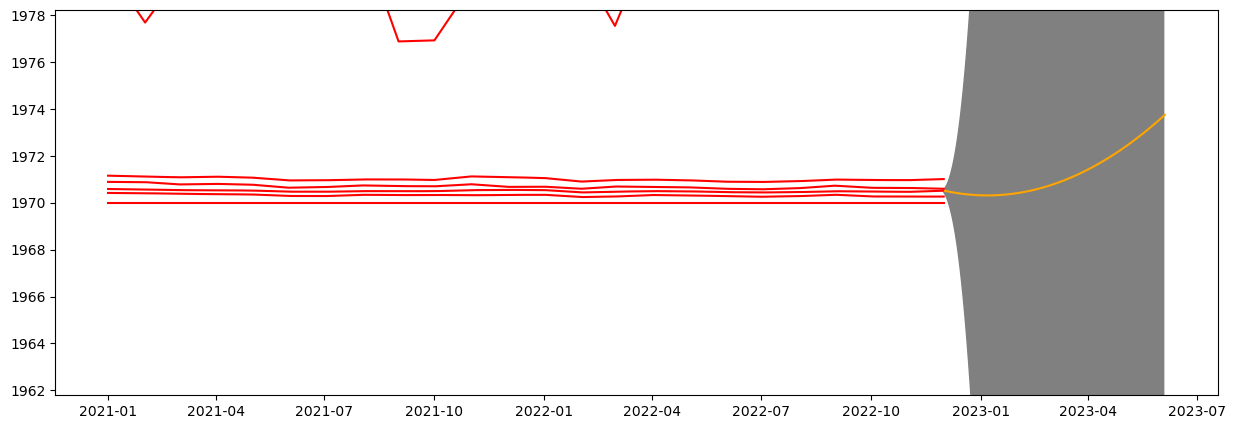

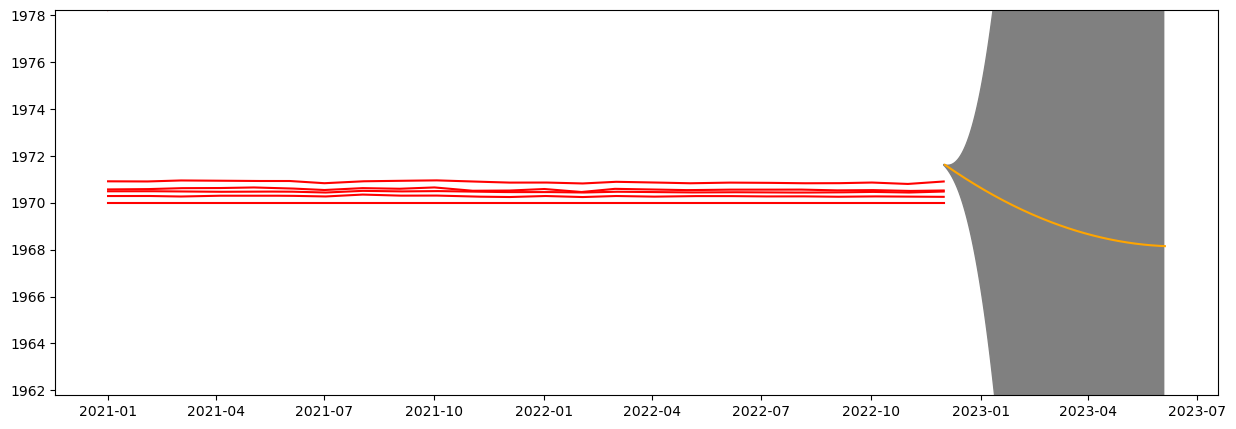

In [142]:
for i, df in enumerate(X_interpolated):

        cf= pd.DataFrame(confints[i])
        prediction_series = pd.Series(predictions[i],index=period_indexes[i])
        plt.figure(figsize=(15, 5))
        #plt.plot(df, color='red', label='Actual')
        #plt.plot(predictions[i], color='orange', label='Predicted')
        plt.fill_between(prediction_series.index,
                        cf[0],
                        cf[1],color='grey', label='Confidence Intervals Area')
        plt.ylim(-3000, 3000)
        #plt.legend()
        #plt.show()

In [143]:
len(models)

36


 ARIMA(0,3,3)(1,0,1)[4]             : AIC=inf, Time=1.61 sec
 ARIMA(0,3,3)(2,0,0)[4]             : AIC=inf, Time=0.96 sec
 ARIMA(1,3,1)(2,0,0)[4]             : AIC=inf, Time=0.80 sec
 ARIMA(1,3,2)(0,0,1)[4]             : AIC=inf, Time=1.40 sec
 ARIMA(1,3,2)(2,0,0)[4]             : AIC=inf, Time=2.33 sec
 ARIMA(2,3,0)(1,0,1)[4]             : AIC=8123.056, Time=0.13 sec
 ARIMA(2,3,0)(2,0,0)[4]             : AIC=8123.056, Time=0.18 sec
 ARIMA(2,3,1)(0,0,1)[4]             : AIC=inf, Time=0.71 sec
 ARIMA(2,3,1)(2,0,0)[4]             : AIC=inf, Time=1.08 sec
 ARIMA(2,3,3)(0,0,0)[4]             : AIC=inf, Time=2.29 sec
 ARIMA(3,3,1)(0,0,0)[4]             : AIC=inf, Time=0.58 sec
 ARIMA(3,3,1)(1,0,0)[4]             : AIC=inf, Time=0.91 sec
 ARIMA(0,3,0)(0,0,1)[4]             : AIC=7692.758, Time=0.18 sec
 ARIMA(0,3,0)(2,0,0)[4]             : AIC=7694.756, Time=0.17 sec
 ARIMA(0,3,1)(0,0,0)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(0,3,1)(1,0,0)[4]             : AIC=inf, Time=0.41 sec
 AR